In [1]:
import os
import numpy as np
import mne
import imageio
import h5py
#import scipy.fftpack
import matplotlib
%matplotlib inline
import pywt
from matplotlib.ticker import ScalarFormatter
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
#from scipy import signal
from matplotlib.colors import ListedColormap
import time
import seaborn as sns
#import scipy.io as sio
#from scipy.integrate import simps
import pandas as pd
#from scipy import fft
import matplotlib.mlab as mlab
import sys
sys.path.append('T:\EL_experiment\Codes\CCEP_human\Python_Analysis\py_functions')
import analys_func
from scipy.stats import norm
import LL_funcs
from scipy.stats import norm
from tkinter import filedialog
from tkinter import *
import ntpath
root = Tk()
root.withdraw()
import math
import scipy
from scipy import signal
import pylab
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
import platform
from glob import glob
from scipy.io import savemat
import basic_func as bf
import tqdm
from matplotlib.patches import Rectangle
import IO_basic as IO
import IO_func as IOF
from scipy import stats
import freq_funcs as ff
from sklearn.decomposition import NMF
import NMF_funcs as NMFf
import glob
import sklearn
from scipy.spatial import distance
cwd             = os.getcwd()


In [2]:
import basic_func as bf

## BM

In [3]:
file_con_sleep = self.path_patient_analysis + '\\' + self.folder + '\\' + self.cond_folder + '\\data\\con_sleep.csv'

NameError: name 'self' is not defined

In [281]:
def get_BMsummary(subjs, folder='BrainMapping', cond_folder='CR', file ='con_sleep.csv'):
    for i in range(len(subjs)):
        print('loading -- '+subjs[i], end='\r')
        subj = subjs[i]
        path_gen = os.path.join('y:\\eLab\Patients\\' + subj)
        if not os.path.exists(path_gen):
            path_gen = 'T:\\EL_experiment\\Patients\\' + subj
        path_patient = path_gen + '\Data\EL_experiment' 
        path_patient_analysis = 'Y:\eLab\Projects\EL_experiment\Analysis\Patients\\'+subj

        path_infos = os.path.join(path_patient, 'infos')
        if not os.path.exists(path_infos):
            path_infos = path_gen + '\\infos'
        
        # labels
        stimlist = pd.read_csv(path_patient_analysis+'/InputOutput/' + cond_folder + '/data/stimlist_' + cond_folder + '.csv')
        lbls = pd.read_excel(os.path.join(path_infos, subj + "_labels.xlsx"), header=0, sheet_name='BP')
        labels_all, labels_region, labels_clinic, coord_all, StimChans, StimChanSM, StimChansC, StimChanIx, stimlist = bf.get_Stim_chans(
            stimlist,
            lbls)
        file_read = path_patient_analysis + '\\' + folder + '\\' + cond_folder + '\\data\\'+file
        AUC_ss = pd.read_csv(file_read)
        AUC_ss.insert(0, 'Subj', subjs[i])
        AUC_ss.insert(1, 'Resp_A', subjs[i])
        AUC_ss.insert(1, 'Stim_A', subjs[i])
        for sc in range(len(labels_all)):
            AUC_ss.loc[(AUC_ss.Stim==sc), 'Stim_A'] =labels_region[sc]
            AUC_ss.loc[(AUC_ss.Chan==sc), 'Resp_A'] =labels_region[sc]
        if i==0:
            data_con    = AUC_ss
        else:
            data_con = pd.concat([data_con, AUC_ss])   
    return data_con

In [167]:
subjs = ["EL013","EL012","EL011","EL015", "EL010",  "EL016", "El014"]
data_con =  get_BMsummary(subjs, folder='BrainMapping', cond_folder='CR')
data_con.insert(5,'t_resp_group','immediate')
data_con.loc[data_con.t_resp>0.025,'t_resp_group'] = 'delay_s'
data_con.loc[data_con.t_resp>0.1,'t_resp_group'] = 'delay_l'

In [27]:
color_elab = np.zeros((3, 3))
color_elab[0, :] = np.array([31, 78, 121]) / 255
color_elab[1, :] = np.array([189, 215, 238]) / 255
color_elab[2, :] = np.array([0.256, 0.574, 0.431])

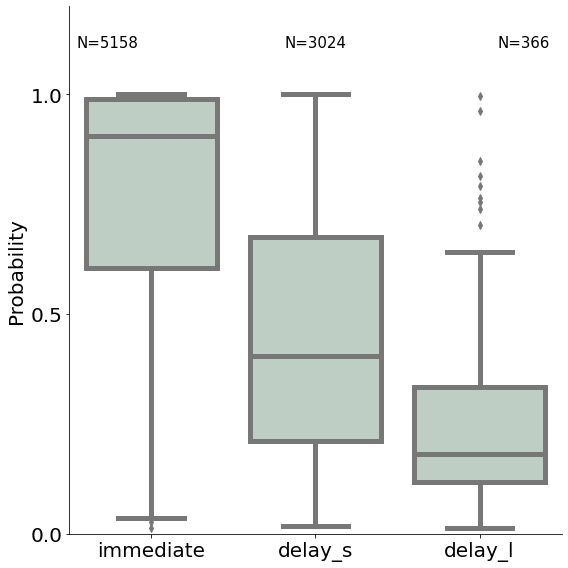

In [168]:
x_col = 'Dist'
x_col = 't_resp_group'

df = data_con[data_con.Sig>0]
order=['local (<15 mm)','short (<30mm)','long']
order=['immediate','delay_s','delay_l'] #order=['local (<15 mm)','short (<30mm)','long']

hue_col =x_col
hue_order=order
width=0.8

y_col = 'Sig'#''Sig'
xl = 'Probability'

g = sns.catplot(kind="box", x=x_col, y=y_col, order=order, data=df, height=8, color='#bdd0c4', linewidth=5) #'#bdd0c4' , color_elab[1]
ax = g.axes[0,0]

# get the offsets used by boxplot when hue-nesting is used
# https://github.com/mwaskom/seaborn/blob/c73055b2a9d9830c6fbbace07127c370389d04dd/seaborn/categorical.py#L367
n_levels = len(df[hue_col].unique())
each_width = width / n_levels
offsets = np.linspace(0, width - each_width, n_levels)
offsets -= offsets.mean()

pos = [x+o for x in np.arange(len(order)) for o in offsets]

counts = df.groupby([x_col,hue_col])[y_col].size()
counts = counts.reindex(pd.MultiIndex.from_product([order,hue_order]))
medians = df.groupby([x_col,hue_col])[y_col].median()
medians = medians.reindex(pd.MultiIndex.from_product([order,hue_order]))
plt.ylim([0,1.2])
plt.yticks([0, 0.5, 1], fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel(xl,  fontsize=20)
plt.xlabel('')
for p,n,m in zip(pos,counts,medians):
    if not np.isnan(m):
        ax.annotate('N={:.0f}'.format(n), xy=(p,1.1), xycoords='data', ha='center', va='bottom', fontsize=15)
plt.tight_layout()
plt.savefig(os.path.join("Y:\eLab\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\General", "sig_ttresp.jpg"), transparent=True)
plt.savefig(os.path.join("Y:\eLab\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\General", "sig_ttresp.svg"), transparent=True)

In [120]:
from scipy.stats import ttest_ind

In [131]:
#define samples
o_i = 2
group1 = df[(df['Dist']==order[o_i])&(df[hue_col]==hue_order[0])]
group2 = df[(df['Dist']==order[o_i])&(df[hue_col]==hue_order[1])]

#perform independent two sample t-test
s, p = ttest_ind(group1['Sig'], group2['Sig'])
print(p)
print(s)
print(order[o_i])

2.2085361297159766e-09
-6.003176887264887
long


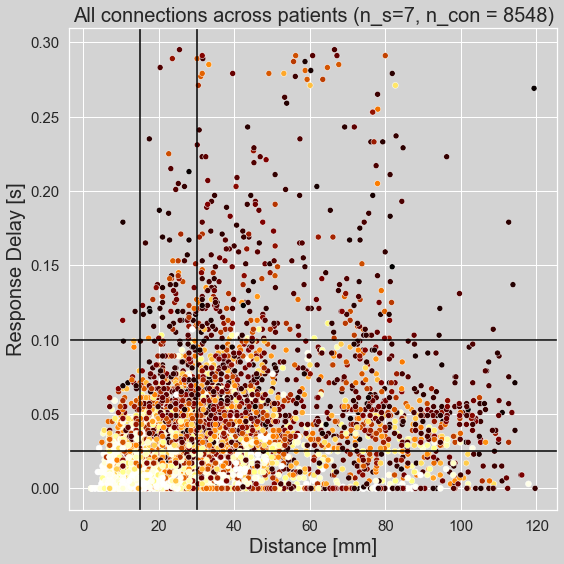

In [234]:
fig = plt.figure(figsize=(8,8))
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey'})
df = data_con[(data_con.d>0)&(data_con.Sig>0)]
plt.title('All connections across patients (n_s=7, n_con = 8548)', fontsize=20)
hue_col ='Dir_B'
# hue_order=np.array([-1.,  1.,  2.])
hue_label=np.array(['unknown', 'Uni-directional','Bi-directional'])
g = sns.scatterplot(x='d', y='t_resp',hue='Sig',data=df, legend=False, palette='afmhot')
#g.colorbar()
plt.axhline(0.025, color=[0,0,0])
plt.axhline(0.1, color=[0,0,0])
plt.axvline(15, color=[0,0,0])
plt.axvline(30, color=[0,0,0])
plt.xlabel('Distance [mm]', fontsize=20)
plt.ylabel('Response Delay [s]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig(os.path.join("Y:\eLab\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\General", "ttresp_dist_prob.jpg"))
plt.savefig(os.path.join("Y:\eLab\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\General", "ttresp_dist_prob.svg"), transparent=True)
plt.show()

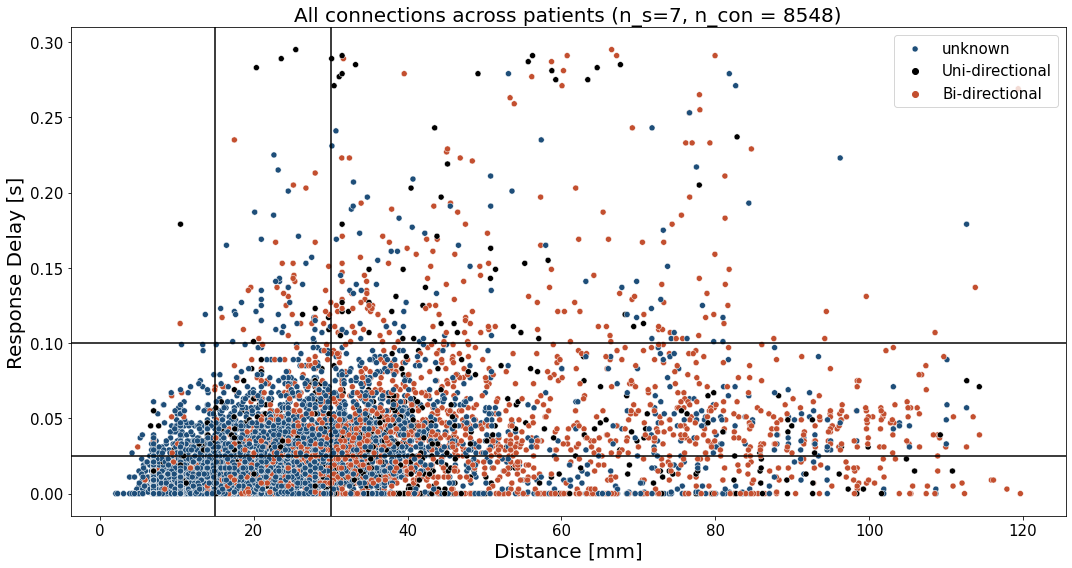

In [206]:
plt.figure(figsize=(15,8))
df = data_con[(data_con.d>0)&(data_con.Sig>0)]
plt.title('All connections across patients (n_s=7, n_con = 8548)', fontsize=20)
hue_col ='Dir_B'
# hue_order=np.array([-1.,  1.,  2.])
hue_label=np.array(['unknown', 'Uni-directional','Bi-directional'])
g = sns.scatterplot(x='d', y='t_resp',hue='Dir_B',hue_order=hue_order, data=df, legend=True, palette=["black","#c34f2f", "#1e4e79"])
#plt.legend([10,1,2], hue_label, fontsize=15)
g.legend(hue_label, fontsize=15)
plt.axhline(0.025, color=[0,0,0])
plt.axhline(0.1, color=[0,0,0])
plt.axvline(15, color=[0,0,0])
plt.axvline(30, color=[0,0,0])
plt.xlabel('Distance [mm]', fontsize=20)
plt.ylabel('Response Delay [s]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig(os.path.join("Y:\eLab\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\General", "ttresp_dist.jpg"), transparent=True)
plt.savefig(os.path.join("Y:\eLab\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\General", "ttresp_dist.svg"), transparent=True)
plt.show()

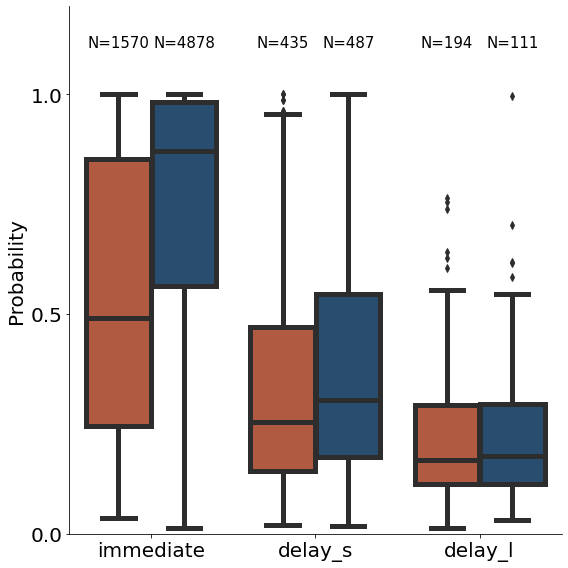

In [147]:
x_col = 't_resp_group'
order=['immediate','delay_s','delay_l'] #order=['local (<15 mm)','short (<30mm)','long']
df = data_con[(data_con.Dir_B>-1)& (data_con.Sig>0)]

# order=['local (<15 mm)','short (<30mm)','long']
hue_col ='Dir_B'
hue_order=[1,2]
hue_label=['Uni-directional','Bi-directional']
width=0.8

y_col = 'Sig'#''Sig'
xl = 'Probability'

g = sns.catplot(kind="box", x=x_col, y=y_col, order=order,hue=hue_col, hue_order=hue_order,data=df, height=8, legend=False, palette=["#c34f2f", "#1e4e79"], linewidth=5)
ax = g.axes[0,0]
#plt.legend(hue_label, fontsize=15)
# get the offsets used by boxplot when hue-nesting is used
# https://github.com/mwaskom/seaborn/blob/c73055b2a9d9830c6fbbace07127c370389d04dd/seaborn/categorical.py#L367
n_levels = len(df[hue_col].unique())
each_width = width / n_levels
offsets = np.linspace(0, width - each_width, n_levels)
offsets -= offsets.mean()

pos = [x+o for x in np.arange(len(order)) for o in offsets]

counts = df.groupby([x_col,hue_col])[y_col].size()
counts = counts.reindex(pd.MultiIndex.from_product([order,hue_order]))
medians = df.groupby([x_col,hue_col])[y_col].median()
medians = medians.reindex(pd.MultiIndex.from_product([order,hue_order]))
plt.ylim([0,1.2])
plt.yticks([0, 0.5, 1], fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel(xl,  fontsize=20)
plt.xlabel('')

for p,n,m in zip(pos,counts,medians):
    if not np.isnan(m):
        ax.annotate('N={:.0f}'.format(n), xy=(p,1.1), xycoords='data', ha='center', va='bottom', fontsize=15)
plt.tight_layout()
plt.savefig(os.path.join("Y:\eLab\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\General", "prob_ttresp_dir.jpg"), transparent=True)
plt.savefig(os.path.join("Y:\eLab\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\General", "prob_ttresp_dir.svg"), transparent=True)

## BM sleep

In [283]:
subjs = ["EL011","EL015", "EL010",  "EL016", "EL014"]
data_con =  get_BMsummary(subjs, folder='BrainMapping', cond_folder='CR')
data_con.insert(5,'t_resp_group','immediate')
data_con.loc[data_con.t_resp>0.025,'t_resp_group'] = 'delay_s'
data_con.loc[data_con.t_resp>0.1,'t_resp_group'] = 'delay_l'

In [286]:
color_sleep_change = dict(no="black", stable="gainsboro", decrease="blue", increase="red")

In [287]:
change_labels = ['unknown', 'no', 'stable', 'decrease', 'increase']
for i in range(0,len(change_labels)):
    data_con.loc[data_con.prob_wake==i-1, 'prob_wake'] = change_labels[i]
    data_con.loc[data_con.ttest_wake==i-1, 'ttest_wake'] = change_labels[i]
color_sleep_change = dict(no="black", stable="gainsboro", decrease="blue", increase="red")

In [34]:
if platform.system() == 'Windows':
    # sep = ','
    path = 'y:\eLab\Patients\\'  # + subj
    CR_color = pd.read_excel("T:\EL_experiment\Patients\\" + 'all' + "\Analysis\BrainMapping\CR_color.xlsx",
                             header=0)
    regions = pd.read_excel("Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\Across\elab_labels.xlsx", sheet_name='regions',
                            header=0)

    # path_patient    = 'E:\PhD\EL_experiment\Patients\\'+subj # os.path.dirname(os.path.dirname(cwd))+'/Patients/'+subj
else:  # 'Darwin' for MAC
    path = '/Volumes/EvM_T7/PhD/EL_experiment/Patients/'  # + subj
    CR_color = pd.read_excel("/Volumes/EvM_T7/PhD/EL_experiment/Patients/all/Analysis/BrainMapping/CR_color.xlsx",
                             header=0)
    regions = pd.read_excel("/Volumes/EvM_T7/PhD/EL_experiment/Patients/all/elab_labels.xlsx", sheet_name='regions',
                            header=0)

sep = ';'
color_regions = regions.color.values
C = regions.label.values
cond_folder = 'CR'

In [31]:
data_con.insert(1,'StimR', 'test')
data_con.insert(1,'RespR', 'test')
for i in range(len(regions)): # , area in zip([regions.label, regions.area]):
    ll = regions.label.values[i]
    area = regions.area.values[i]
    data_con.loc[data_con.Stim_A==ll, 'StimR'] =area
    data_con.loc[data_con.Resp_A==ll, 'RespR'] =area

NameError: name 'data_con' is not defined

In [ ]:
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'white'})
plt.savefig(os.path.join("Y:\eLab\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\\BM_change",ss+'_hist'+stimA+'.jpg'))
plt.savefig(os.path.join("Y:\eLab\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\\BM_change",ss+'_hist'+stimA+'.jpg'))


In [300]:
for stimA in np.unique(data_con.StimR):
    
    for ss in ['NREM', 'REM']:
        fig = plt.figure(figsize=(10,5))
        sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'white'})
        sns.histplot(x='d', multiple='stack',hue='ttest_wake', data= data_con[(data_con.StimR==stimA)&(data_con.ttest_wake!='no')&(data_con.SleepState==ss)&(data_con.Sig==1)], palette=dict(unknown="grey",no="black", stable="white", decrease="blue", increase="red"))
        plt.legend(['Increase','Decrease','Stable'], fontsize=15)
        plt.title('Connections during '+ss+', Stim in: '+stimA, fontsize=20)

        plt.xlabel('Connection Distance [mm]',  fontsize=20)
        plt.ylabel('Number of Connections',  fontsize=20)
        plt.yticks(fontsize=15)
        plt.xticks(fontsize=15)
        plt.tight_layout()
        plt.savefig(os.path.join("Y:\eLab\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\\BM_change",ss+'_hist'+stimA+'.jpg'))
        plt.savefig(os.path.join("Y:\eLab\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\\BM_change",ss+'_hist'+stimA+'.jpg'))
        plt.close(fig)

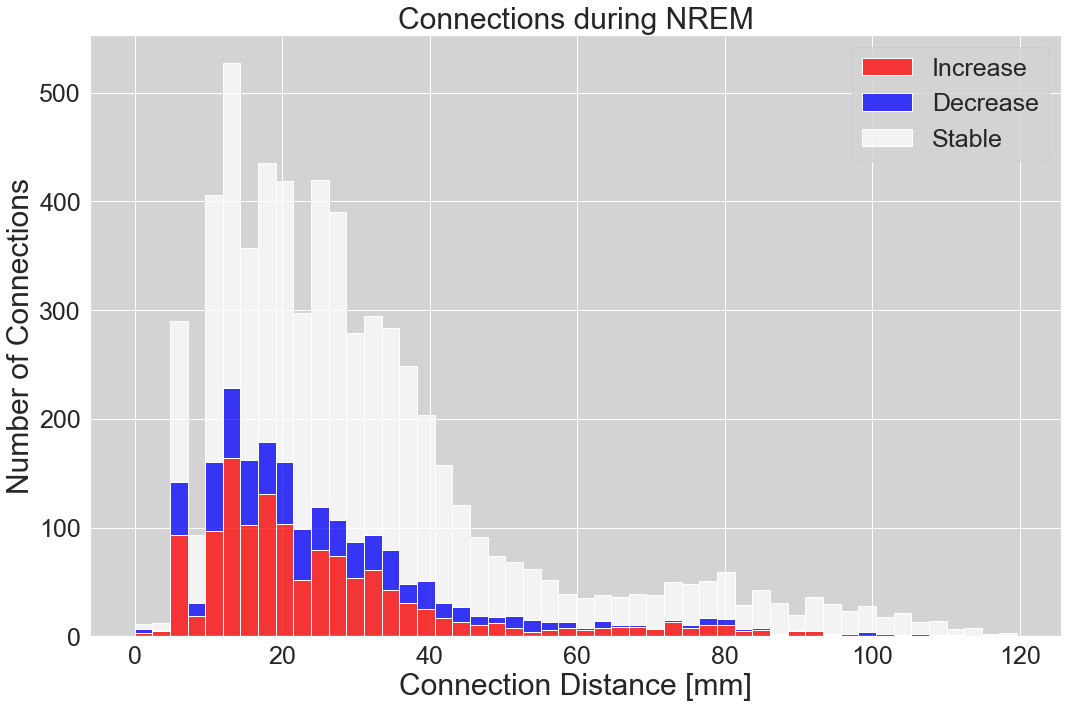

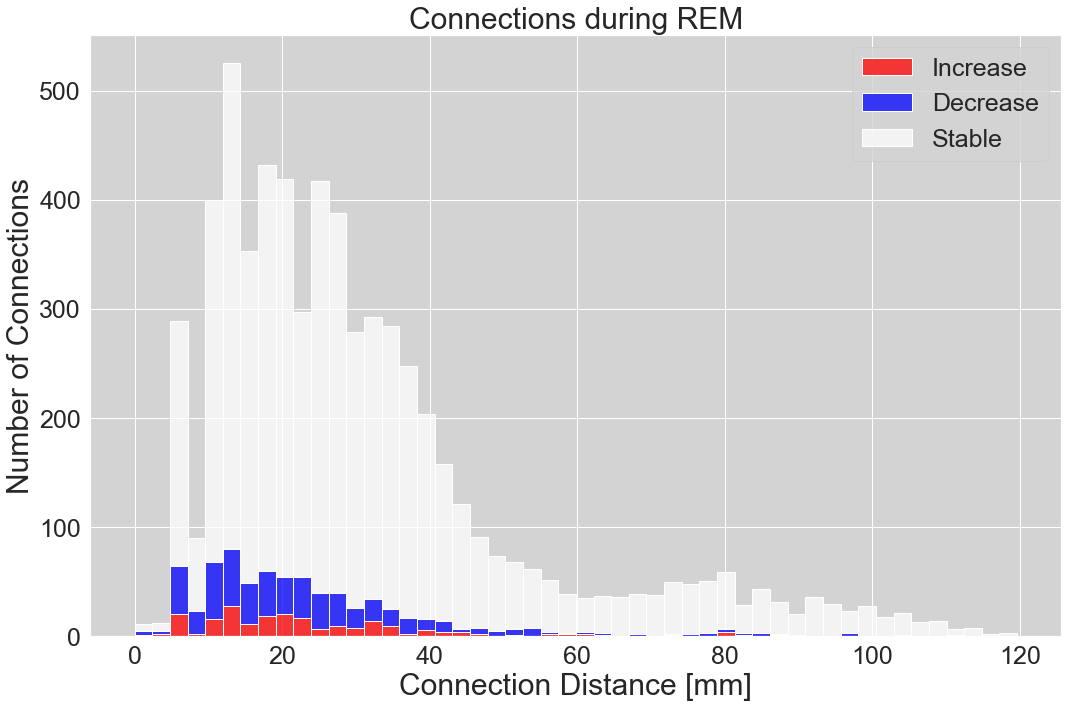

In [304]:

for ss in ['NREM', 'REM']:
    fig = plt.figure(figsize=(15,10))
    sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'white'})
    sns.histplot(x='d', multiple='stack',hue='ttest_wake', data= data_con[(data_con.ttest_wake!='no')&(data_con.SleepState==ss)&(data_con.Sig==1)], palette=dict(unknown="grey",no="black", stable="white", decrease="blue", increase="red"))
    plt.legend(['Increase','Decrease','Stable'], fontsize=25)
    plt.title('Connections during '+ss, fontsize=30)

    plt.xlabel('Connection Distance [mm]',  fontsize=30)
    plt.ylabel('Number of Connections',  fontsize=30)
    plt.yticks(fontsize=25)
    plt.xticks(fontsize=25)
    plt.tight_layout()
    plt.savefig(os.path.join("Y:\eLab\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\\BM_change",ss+'_hist.jpg'))
    plt.savefig(os.path.join("Y:\eLab\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\\BM_change",ss+'_hist.jpg'))
    plt.show(fig)

In [301]:
# plt.figure(figsize=(10,5))
#plt.title('REM Effect')
for ss in ['NREM', 'REM']:
    sns.catplot(x='Dist',hue='ttest_wake', kind='count',data= data_con[(data_con.SleepState==ss)&(data_con.Sig==1)], palette=color_sleep_change, height=15, legend=False)
    plt.legend(['Increase','Decrease','Stable'], fontsize=25)
    plt.title('Connections during '+ss, fontsize=30)
    plt.xlabel('Connection Distance',  fontsize=30)
    plt.ylabel('Number of Connections',  fontsize=30)
    plt.yticks(fontsize=25)
    plt.xticks(fontsize=25)
    plt.tight_layout()
    plt.savefig(os.path.join("Y:\eLab\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\\BM_change",ss+'_bar.jpg'), transparent=True)
    plt.savefig(os.path.join("Y:\eLab\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\\BM_change",ss+'_bar.jpg'), transparent=True)

    plt.close()

## AUC

In [15]:
subjs = ["EL004","EL005","EL011","EL015", "EL010",  "EL016", "El014", "El017", "El019"]

In [24]:
AUC_all = get_subnetwork_across_Stim(subjs, metric='LL', folder='InputOutput', cond_folder='CR',cond = 'SleepState')

In [28]:
color =[color_elab[0],color_elab[0], '#f65858']
color[0] = [0,0,0]

In [36]:
#AUC_all.insert(1,'StimR', 'test')
for i in range(len(regions)): # , area in zip([regions.label, regions.area]):
    ll = regions.label.values[i]
    area = regions.area.values[i]
    AUC_all.loc[AUC_all.Stim_A==ll, 'StimR'] =area

In [45]:
len(pos)/3

3.0

In [46]:
counts

Insula     Wake    11
           NREM    11
           REM     11
Limbic     Wake    33
           NREM    35
           REM     35
Neocortex  Wake    17
           NREM    20
           REM     20
Name: AUCn, dtype: int64

In [63]:
color[0] = [0,0,0]

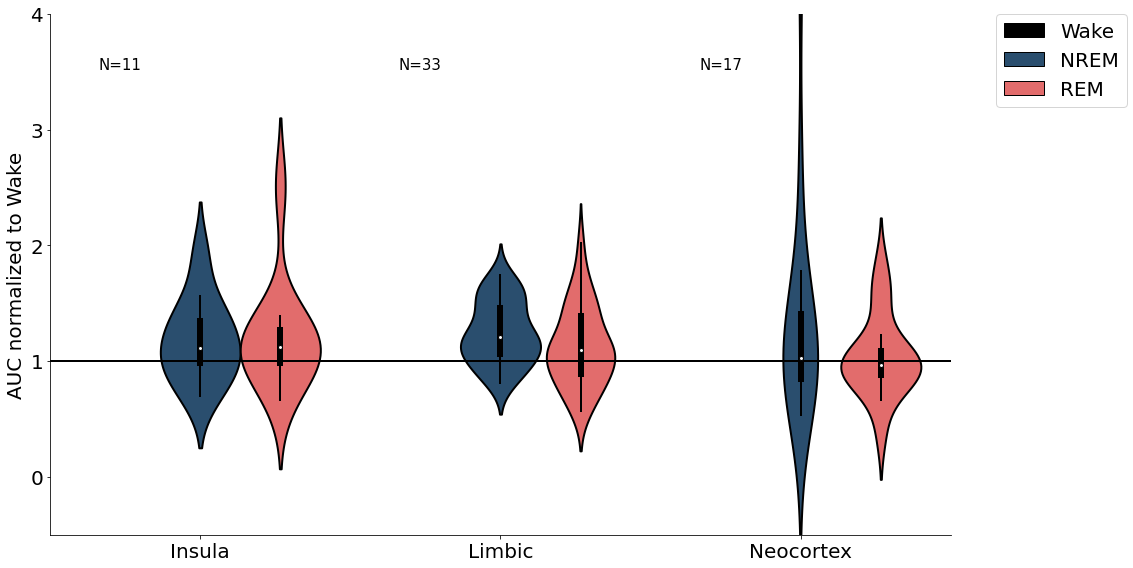

In [81]:
df = AUC_all[AUC_all.SleepState!='Wake_M']

x_col = 'StimR'
order=np.unique(df.StimR) #order=['local (<15 mm)','short (<30mm)','long']


# order=['local (<15 mm)','short (<30mm)','long']
hue_col ='SleepState'
hue_order=['Wake', 'NREM', 'REM']
hue_label=hue_order#['Uni-directional','Bi-directional']
width=0.8

y_col = 'AUCn'#''Sig'
xl = 'AUC normalized to Wake'

g = sns.catplot(kind="violin", x=x_col, y=y_col, order=order,hue=hue_col, hue_order=hue_order,data=df, aspect = 2,height=8,legend=False, palette=color, linewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
ax = g.axes[0,0]

# get the offsets used by boxplot when hue-nesting is used
# https://github.com/mwaskom/seaborn/blob/c73055b2a9d9830c6fbbace07127c370389d04dd/seaborn/categorical.py#L367
n_levels = len(df[hue_col].unique())
each_width = width / n_levels
offsets = np.linspace(0, width - each_width, n_levels)
offsets -= offsets.mean()

pos = [x+o for x in np.arange(len(order)) for o in offsets]

counts = df.groupby([x_col,hue_col])[y_col].size()
counts = counts.reindex(pd.MultiIndex.from_product([order,hue_order]))
medians = df.groupby([x_col,hue_col])[y_col].median()
medians = medians.reindex(pd.MultiIndex.from_product([order,hue_order]))
plt.ylim([-0.5,4])
plt.yticks([0, 1, 2,3,4], fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel(xl,  fontsize=20)
plt.xlabel('')
plt.axhline(1, color=[0,0,0], linewidth=2)
for i,p,n,m in zip(np.arange(len(pos)),pos,counts,medians):
    if np.mod(i,len(hue_order))==0: 
        if not np.isnan(m):
            ax.annotate('N={:.0f}'.format(n), xy=(p,3.5), xycoords='data', ha='center', va='bottom', fontsize=15)
plt.tight_layout()
plt.savefig(os.path.join("Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\Across\IO\CR\\NMF",'AUC_sleep.jpg'))
plt.savefig(os.path.join("Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\Across\IO\CR\\NMF",'AUC_sleep.svg'))

In [10]:
def get_subnetwork_across_Stim(subjs, metric='LL', folder='InputOutput', cond_folder='CR',cond = 'SleepState'):
    for i in range(len(subjs)):
        print('loading -- '+subjs[i], end='\r')
        subj = subjs[i]
        path_gen = os.path.join('y:\\eLab\Patients\\' + subj)
        if not os.path.exists(path_gen):
            path_gen = 'T:\\EL_experiment\\Patients\\' + subj
        path_patient = path_gen + '\Data\EL_experiment' 
        path_infos = os.path.join(path_patient, 'infos')
        if not os.path.exists(path_infos):
            path_infos = path_gen + '\\infos'
        path_patient_analysis = 'Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\\'+subj
        nmf_path = path_patient_analysis + '\\' + folder + '\\' + cond_folder + '\\NNMF_Stim\\' 
        file = os.path.join(nmf_path, 'summary.csv')

        AUC_ss = pd.read_csv(file)
        
        # labels
        stimlist = pd.read_csv(path_patient_analysis+'/InputOutput/' + cond_folder + '/data/stimlist_' + cond_folder + '.csv')
        lbls = pd.read_excel(os.path.join(path_infos, subj + "_labels.xlsx"), header=0, sheet_name='BP')
        labels_all, labels_region, labels_clinic, coord_all, StimChans, StimChanSM, StimChansC, StimChanIx, stimlist = bf.get_Stim_chans(
            stimlist,
            lbls)

        AUC_ss.insert(0, 'Subj', subjs[i])
        AUC_ss.insert(1, 'Stim_A', subjs[i])
        for sc in range(len(labels_all)):
            AUC_ss.loc[(AUC_ss.Stim==sc), 'Stim_A'] =labels_region[sc]
        
        for Hs in AUC_ss.H:
            for sc in AUC_ss.Stim:
                mn = np.mean(AUC_ss.loc[(AUC_ss.SleepState=='Wake')&(AUC_ss.H==Hs)&(AUC_ss.Stim==sc), 'AUC'])
                AUC_ss.loc[(AUC_ss.H==Hs)&(AUC_ss.Stim==sc), 'AUCn'] = AUC_ss.loc[(AUC_ss.H==Hs)&(AUC_ss.Stim==sc), 'AUC']/mn
            
        if i==0:
            data_con    = AUC_ss
        else:
            data_con = pd.concat([data_con, AUC_ss])   
    return data_con

In [22]:
def get_subnetwork_Stim(subj, metric='LL', folder='InputOutput', cond_folder='CR',cond = 'SleepState'):
    path_gen = os.path.join('y:\\eLab\Patients\\' + subj)
    if not os.path.exists(path_gen):
        path_gen = 'T:\\EL_experiment\\Patients\\' + subj
    path_patient = path_gen + '\Data\EL_experiment' 
    path_patient_analysis = 'Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\\'+subj
    sep =';'  

    path_infos = os.path.join(path_patient, 'infos')
    if not os.path.exists(path_infos):
        path_infos = path_gen + '\\infos'
    nmf_path_all = path_patient_analysis + '\\' + folder + '\\' + cond_folder + '\\NNMF_Stim\\' 
    stimlist = pd.read_csv(path_patient_analysis+'/InputOutput/' + cond_folder + '/data/stimlist_' + cond_folder + '.csv')
    lbls = pd.read_excel(os.path.join(path_infos, subj + "_labels.xlsx"), header=0, sheet_name='BP')
    labels_all, labels_region, labels_clinic, coord_all, StimChans, StimChanSM, StimChansC, StimChanIx, stimlist = bf.get_Stim_chans(
        stimlist,
        lbls)

    path_Stim_chans = os.listdir(nmf_path_all)
    start = 0
    for stim_folder in path_Stim_chans[:4]:
        nmf_path = os.path.join(nmf_path_all,stim_folder)
        asso = pd.read_csv(glob.glob(nmf_path + '\\IO_association_1rk*.csv')[0])
        rk =  glob.glob(nmf_path + '\\IO_association_1rk*.csv')[0][-5:-4]
        W = pd.read_csv(glob.glob(nmf_path + '\\W_1rk'+rk+'.csv')[0])
        NMR_con = pd.read_csv(glob.glob(nmf_path + '\\IO_CR_1rk'+rk+'.csv')[0])
        
        AUC_ss = pd.read_csv(glob.glob(nmf_path + '\\IO_' + cond + '_AUC_1rk'+rk+'.csv')[0])
    
        # get responsive channels
        W_col = []
        H_col = []
        for i in range(W.shape[1]-1):
            W_col.append('W' + str(i + 1))
            H_col.append('H' + str(i + 1))

        W_clusters = np.zeros((W.shape[1]-1,W.shape[0]))
        i = 0
        for w_str in W_col:
            W_sel = W[w_str].values
            kmeans = sklearn.cluster.KMeans(n_clusters=2, random_state=0).fit(W_sel.reshape(-1, 1))
            if np.mean(W_sel[kmeans.labels_==0])<np.mean(W_sel[kmeans.labels_==1]):
                W_clusters[i,kmeans.labels_==1] = 1
            else:
                W_clusters[i,kmeans.labels_==0] = 1
            i = i+1
        sc = int(AUC_ss.Stim.values[0])
        dat = AUC_ss[AUC_ss.Stim == sc]
        for Hs in np.unique(asso['H_num']):
            w_chans = np.where(W_clusters[(Hs-1).astype('int'),:]==1)[0]
            if len(w_chans)>0:
                dists = np.zeros((len(w_chans),))
                for i in range(len(w_chans)):
                    dists[i] = np.round(
                        distance.euclidean(coord_all[sc], coord_all[w_chans[i]]), 2)
                AUC_ss.loc[(AUC_ss.Stim==sc)&(AUC_ss.H==Hs), 'n_con'] =len(w_chans)
                AUC_ss.loc[(AUC_ss.Stim==sc)&(AUC_ss.H==Hs), 'mean_dist'] =np.nanmean(dists)
                if np.mean(dists)<30:
                    AUC_ss.loc[(AUC_ss.Stim==sc)&(AUC_ss.H==Hs), 'dist_group'] = 'local'
                else:
                    AUC_ss.loc[(AUC_ss.Stim==sc)&(AUC_ss.H==Hs), 'dist_group'] = 'distant'
            else:
                AUC_ss.loc[(AUC_ss.Stim==sc)&(AUC_ss.H==Hs), 'n_con'] =0
                AUC_ss.loc[(AUC_ss.Stim==sc)&(AUC_ss.H==Hs), 'mean_dist'] =np.nan
                AUC_ss.loc[(AUC_ss.Stim==sc)&(AUC_ss.H==Hs), 'dist_group'] = 'no'
        if start ==0:
            AUC_ss_all = AUC_ss
            start = 1
        else:
            AUC_ss_all = pd.concat([AUC_ss_all, AUC_ss])
            

    file = os.path.join(nmf_path_all, 'summary.csv')
    AUC_ss_all.to_csv(file, index=False, header=True)
    print(file+' ------ saved ----')
    return AUC_ss_all

In [23]:
for subj in subjs:
    print(subj)
    AUC_ss = get_subnetwork_Stim(subj, metric='LL', folder='InputOutput', cond_folder='CR',cond = 'SleepState')

EL004
Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\EL004\InputOutput\CR\NNMF_Stim\summary.csv ------ saved ----
EL005
Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\EL005\InputOutput\CR\NNMF_Stim\summary.csv ------ saved ----
EL011
Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\EL011\InputOutput\CR\NNMF_Stim\summary.csv ------ saved ----
EL015
Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\EL015\InputOutput\CR\NNMF_Stim\summary.csv ------ saved ----
EL010
Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\EL010\InputOutput\CR\NNMF_Stim\summary.csv ------ saved ----
EL016
Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\EL016\InputOutput\CR\NNMF_Stim\summary.csv ------ saved ----
El014
Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\El014\InputOutput\CR\NNMF_Stim\summary.csv ------ saved ----
El017
Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\El017\InputOutput\CR\NNMF_Stim\summary.csv ------ saved ----
El019
Y:\eLab\EvM\Projects\EL_experiment

In [331]:
g = sns.catplot(x='StimR', y='AUCn', hue='SleepState', data=data_con, kind='box', col = 'dist_group', height=6,aspect=2)
plt.suptitle(m+' subnetworks across patients, n='+str(len(subjs)), fontsize=20)


ValueError: Could not interpret input 'AUCn'

In [3]:
def get_subnetwork_across(subjs, metric='LL', folder='InputOutput', cond_folder='CR',cond = 'SleepState'):
    for i in range(len(subjs)):
        print('loading -- '+subjs[i], end='\r')
        subj = subjs[i]
        path_patient_analysis = 'T:\EL_experiment\Projects\EL_experiment\Analysis\Patients\\'+subj
        path_patient    = 'T:\EL_experiment\Patients\\'+subj+'\Data\EL_experiment' # os.path.dirname(os.path.dirname(cwd))+'/Patients/'+subj


        nmf_path = path_patient_analysis + '\\' + folder + '\\' + cond_folder + '\\NNMF\\' + metric + '/'
        file = nmf_path + 'summary.csv'
        AUC_ss = pd.read_csv(file)
        AUC_ss.insert(0, 'Subj', subjs[i])
        
        for Hs in AUC_ss.H:
            for sc in AUC_ss.Stim:
                mn = np.mean(AUC_ss.loc[(AUC_ss.SleepState=='Wake_M')&(AUC_ss.H==Hs)&(AUC_ss.Stim==sc), 'AUC'])
                AUC_ss.loc[(AUC_ss.H==Hs)&(AUC_ss.Stim==sc), 'AUCn'] = AUC_ss.loc[(AUC_ss.H==Hs)&(AUC_ss.Stim==sc), 'AUC']/mn
            
        if i==0:
            data_con    = AUC_ss
        else:
            data_con = pd.concat([data_con, AUC_ss])   
    return data_con

In [10]:
NNMF_ass = np.zeros((1, 4))
Int_all = np.unique(data.Int)
Stims = np.unique(data.Stim)
s = 0


In [14]:
asso

Stim        AUC   H  H_num  threshold
0   5.0  26.380126  H4    4.0   5.074135
1  27.0  20.597872  H6    6.0   7.406414
2  49.0  21.351900  H1    1.0   3.156048
3  60.0  23.554087  H2    2.0   1.871056

In [16]:
import random

In [18]:
auc_test

26.380126447292938

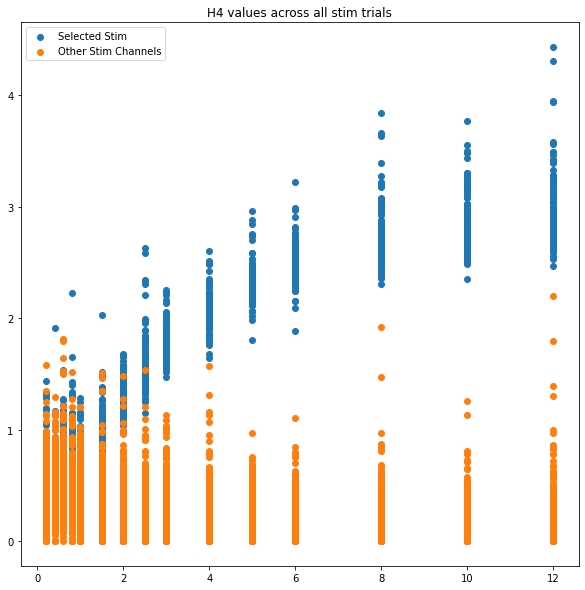

In [29]:
plt.figure(figsize=(10,10))
plt.title('H4 values across all stim trials')
plt.scatter(x='Int', y='H4', data=con_nmf_test, label='Selected Stim')
plt.scatter(x='Int', y='H4', data=con_nmf_surr, label='Other Stim Channels')
plt.legend()

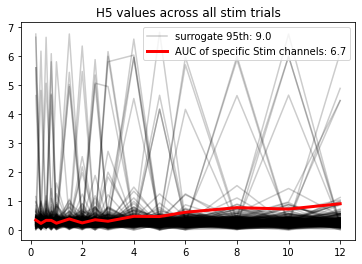

In [80]:
sc = Stims[0]
con_nmf_test = data[data.Stim == sc]
con_nmf_surr = data[data.Stim != sc]
h = 5
Hs = 'H'+str(h)
con_nmf_test_sum = con_nmf_test.groupby(['Stim', 'Int'])[Hs].mean()

auc_test = np.trapz(con_nmf_test_sum.values, np.unique(con_nmf_test.Int))
surr = np.zeros((300,))
plt.title(Hs+' values across all stim trials')
for i in range(len(surr)):
    h_sur = random.choices(con_nmf_surr[Hs].values, k=len(np.unique(con_nmf_test.Int)))
    surr[i] = np.trapz(h_sur,
                       np.unique(con_nmf_test.Int))
    plt.plot(Int, h_sur, color=[0,0,0], alpha=0.2)
plt.plot(Int, h_sur, color=[0,0,0], alpha=0.2, label='surrogate 95th: '+str(np.round(np.percentile(surr, 95),1)))
plt.plot(Int, con_nmf_test_sum.values, label='AUC of specific Stim channels: '+str(np.round(auc_test,1)), color=[1,0,0], linewidth=3)
plt.legend()


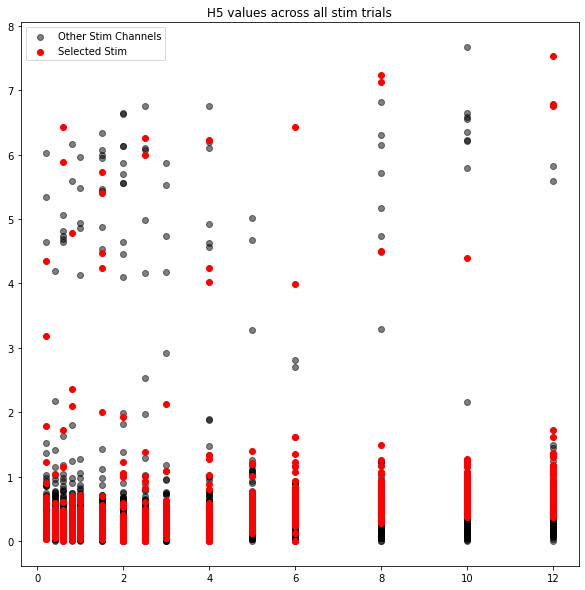

In [81]:
plt.figure(figsize=(10,10))
plt.title(Hs+' values across all stim trials')

plt.scatter(x='Int', y=Hs, data=con_nmf_surr, label='Other Stim Channels',color=[0,0,0], alpha=0.5)
plt.scatter(x='Int', y=Hs, data=con_nmf_test, label='Selected Stim', color=[1,0,0])
plt.legend()

In [9]:
data = NMR_con

In [7]:
subj = 'EL004'
metric='LL'
folder='InputOutput'
cond_folder='CR'
cond = 'SleepState'
    
path_patient_analysis = 'T:\EL_experiment\Projects\EL_experiment\Analysis\Patients\\'+subj
path_patient    = 'T:\EL_experiment\Patients\\'+subj+'\Data\EL_experiment' # os.path.dirname(os.path.dirname(cwd))+'/Patients/'+subj

sep =';'  
nmf_path = path_patient_analysis + '\\' + folder + '\\' + cond_folder + '\\NNMF\\' + metric + '/'
stimlist = pd.read_csv(path_patient_analysis+'/InputOutput/' + cond_folder + '/data/stimlist_' + cond_folder + '.csv')
lbls = pd.read_excel(path_patient + "\\infos\\" + subj + "_labels.xlsx", header=0, sheet_name='BP')
labels_all, labels_region, labels_clinic, coord_all, StimChans, StimChanSM, StimChansC, StimChanIx, stimlist = bf.get_Stim_chans(
    stimlist,
    lbls)
# data
W = pd.read_csv(glob.glob(nmf_path + 'W_1rk*.csv')[0])
NMR_con = pd.read_csv(glob.glob(nmf_path + 'IO_CR_1rk*.csv')[0])
asso = pd.read_csv(glob.glob(nmf_path + 'IO_association_1rk*.csv')[0])
AUC_ss = pd.read_csv(glob.glob(nmf_path + 'IO_' + cond + '_AUC_1rk*.csv')[0])

In [4]:
def get_subnetwork(subj, metric='LL', folder='InputOutput', cond_folder='CR',cond = 'SleepState'):
    path_patient_analysis = 'T:\EL_experiment\Projects\EL_experiment\Analysis\Patients\\'+subj
    path_patient    = 'T:\EL_experiment\Patients\\'+subj+'\Data\EL_experiment' # os.path.dirname(os.path.dirname(cwd))+'/Patients/'+subj

    sep =';'  
    nmf_path = path_patient_analysis + '\\' + folder + '\\' + cond_folder + '\\NNMF\\' + metric + '/'
    stimlist = pd.read_csv(path_patient_analysis+'/InputOutput/' + cond_folder + '/data/stimlist_' + cond_folder + '.csv')
    lbls = pd.read_excel(path_patient + "\\infos\\" + subj + "_labels.xlsx", header=0, sheet_name='BP')
    labels_all, labels_region, labels_clinic, coord_all, StimChans, StimChanSM, StimChansC, StimChanIx, stimlist = bf.get_Stim_chans(
        stimlist,
        lbls)
    # data
    W = pd.read_csv(glob.glob(nmf_path + 'W_1rk*.csv')[0])
    NMR_con = pd.read_csv(glob.glob(nmf_path + 'IO_CR_1rk*.csv')[0])
    asso = pd.read_csv(glob.glob(nmf_path + 'IO_association_1rk*.csv')[0])
    AUC_ss = pd.read_csv(glob.glob(nmf_path + 'IO_' + cond + '_AUC_1rk*.csv')[0])
    
    # get responsive channels
    W_col = []
    H_col = []
    for i in range(W.shape[1]-1):
        W_col.append('W' + str(i + 1))
        H_col.append('H' + str(i + 1))

    W_clusters = np.zeros((W.shape[1]-1,W.shape[0]))
    i = 0
    for w_str in W_col:
        W_sel = W[w_str].values
        kmeans = sklearn.cluster.KMeans(n_clusters=2, random_state=0).fit(W_sel.reshape(-1, 1))
        if np.mean(W_sel[kmeans.labels_==0])<np.mean(W_sel[kmeans.labels_==1]):
            W_clusters[i,kmeans.labels_==1] = 1
        else:
            W_clusters[i,kmeans.labels_==0] = 1
        i = i+1
    ## 
    Stims = np.unique(asso.Stim)
    for sc in Stims.astype('int'):
        dat = AUC_ss[AUC_ss.Stim == sc]
        for Hs in np.unique(asso.loc[asso.Stim == sc, 'H_num']):
            w_chans = np.where(W_clusters[(Hs-1).astype('int'),:]==1)[0]
            dists = np.zeros((len(w_chans),))
            for i in range(len(w_chans)):
                dists[i] = np.round(
                    distance.euclidean(coord_all[sc], coord_all[w_chans[i]]), 2)
            AUC_ss.loc[(AUC_ss.Stim==sc)&(AUC_ss.H==Hs), 'n_con'] =len(w_chans)
            AUC_ss.loc[(AUC_ss.Stim==sc)&(AUC_ss.H==Hs), 'mean_dist'] =np.mean(dists)
            if np.mean(dists)<30:
                AUC_ss.loc[(AUC_ss.Stim==sc)&(AUC_ss.H==Hs), 'dist_group'] = 'local'
            else:
                AUC_ss.loc[(AUC_ss.Stim==sc)&(AUC_ss.H==Hs), 'dist_group'] = 'distant'

    file = nmf_path + 'summary.csv'
    AUC_ss.to_csv(file, index=False, header=True)
    print(file+' ------ saved ----')
    return AUC_ss

In [131]:
AUC_ss2 = get_subnetwork(subj, metric='LL', folder='InputOutput', cond_folder='CR',cond = 'SleepState')

T:\EL_experiment\Projects\EL_experiment\Analysis\Patients\EL011\InputOutput\CR\NNMF\LL/summary.csv ------ saved ----


In [3]:
metric='LL'
folder = 'InputOutput'
cond_folder ='CR'

In [4]:
nmf_path = path_patient_analysis + '\\' + folder + '\\' + cond_folder + '\\NNMF\\' + metric + '/'

## ACROSS

In [120]:

Stims = np.unique(asso.Stim)
for sc in Stims.astype('int'):
    dat = AUC_ss[AUC_ss.Stim == sc]
    for Hs in np.unique(asso.loc[asso.Stim == sc, 'H_num']):
        w_chans = np.where(W_clusters[(Hs-1).astype('int'),:]==1)[0]
        dists = np.zeros((len(w_chans),))
        for i in range(len(w_chans)):
            dists[i] = np.round(
                distance.euclidean(coord_all[sc], coord_all[w_chans[i]]), 2)
        AUC_ss.loc[(AUC_ss.Stim==sc)&(AUC_ss.H==Hs), 'n_con'] =len(w_chans)
        AUC_ss.loc[(AUC_ss.Stim==sc)&(AUC_ss.H==Hs), 'mean_dist'] =np.mean(dists)
        if np.mean(dists)<30:
            AUC_ss.loc[(AUC_ss.Stim==sc)&(AUC_ss.H==Hs), 'dist_group'] = 'local'
        else:
            AUC_ss.loc[(AUC_ss.Stim==sc)&(AUC_ss.H==Hs), 'dist_group'] = 'distant'

In [148]:
data_con

Subj            Area  Stim_L  Stim    H SleepState       AUC  Pearson  \
0   EL011    Basotemporal  L_ENT8   7.0  1.0       NREM  0.726920      1.0   
1   EL011    Basotemporal  L_ENT8   7.0  1.0        REM  0.713781      1.0   
2   EL011    Basotemporal  L_ENT8   7.0  1.0     Wake_A  0.874793      1.0   
3   EL011    Basotemporal  L_ENT8   7.0  1.0     Wake_M  0.825676      1.0   
4   EL011    Basotemporal  L_ENT8   7.0  1.0     Wake_N  0.822525      1.0   
..    ...             ...     ...   ...  ...        ...       ...      ...   
25  El014  Laterotemporal   STS54  53.0  7.0       NREM  0.365580      1.0   
26  El014  Laterotemporal   STS54  53.0  7.0        REM  0.386997      1.0   
27  El014  Laterotemporal   STS54  53.0  7.0     Wake_A  0.398204      1.0   
28  El014  Laterotemporal   STS54  53.0  7.0     Wake_M  0.401075      1.0   
29  El014  Laterotemporal   STS54  53.0  7.0     Wake_N  0.407278      1.0   

    N_trial  n_con  mean_dist dist_group  
0     487.0    9.0  15.683333      local  
1     149.0    9.0  15.683333      local  
2     621.0    9.0  15.683333      local  
3     732.0    9.0  15.683333      local  
4     909.0    9.0  15.683333      local  
..      ...    ...        ...        ...  
25    239.0    4.0  62.142500    distant  
26     30.0    4.0  62.142500    distant  
27    383.0    4.0  62.142500    distant  
28    310.0    4.0  62.142500    distant  
29    715.0    4.0  62.142500    distant  

[142 rows x 12 columns]

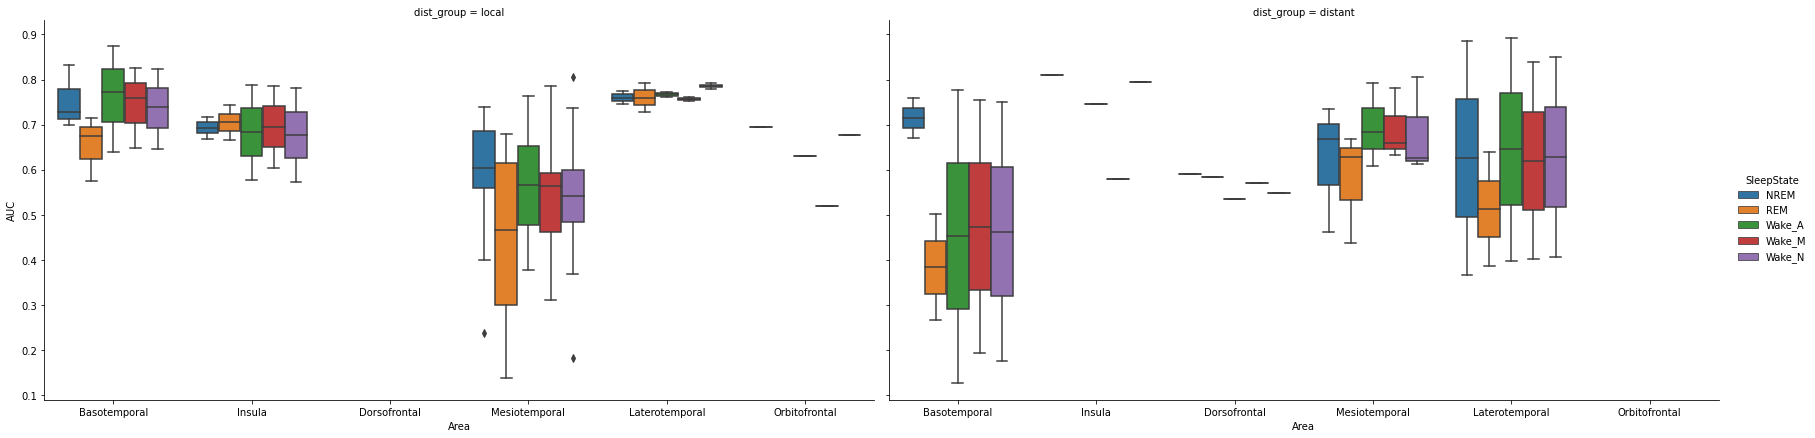

In [37]:
sc = 10

In [41]:
if not 'SleepState' in con_trial_Ph:
    # con_trial= con_trial[con_trial.d>0]
    con_trial_Ph.insert(5, 'SleepState', 'Wake_M')
    con_trial_Ph.loc[(con_trial_Ph.Sleep > 0) & (con_trial.Sleep < 4), 'SleepState'] = 'NREM'
    con_trial_Ph.loc[(con_trial_Ph.Sleep == 4), 'SleepState'] = 'REM'
    con_trial_Ph.loc[(con_trial_Ph.Sleep == 0) & (con_trial_Ph.Hour >= 9) & (con_trial_Ph.Hour < 15), 'SleepState'] = 'Wake_M'
    con_trial_Ph.loc[(con_trial_Ph.Sleep == 0) & (con_trial_Ph.Hour >= 15) & (con_trial_Ph.Hour < 21), 'SleepState'] = 'Wake_A'
    con_trial_Ph.loc[(con_trial_Ph.Sleep == 0) & ((con_trial_Ph.Hour < 9) | (con_trial_Ph.Hour >= 21)), 'SleepState'] = 'Wake_N'
sleepstate_labels = np.unique(con_trial_Ph['SleepState'])[::-1]

In [49]:
file         = glob.glob(path_patient + '/Analysis/InputOutput/' + cond_folder + '/NNMF/IO_'+condition+'_AUC_LLpeak_1*.csv')[0]

data_A    = pd.read_csv(file)
data_A.insert(0, 'Subj', subj)

In [130]:
subjs = ["EL004","EL005", "EL010", "EL011", "EL014", "EL015"] # , "EL013", "EL012"
cond_folder  ='CR'
condition = 'SleepState' #sleep
## NMF AUC
for i in range(len(subjs)):
    print('loading -- '+subjs[i], end='\r')
    if platform.system()=='Windows':
        path_patient = 'T:\EL_experiment\Patients\\'+subjs[i]
    else: #'Darwin' for MAC
        path_patient    = '/Volumes/EvM_T7/PhD/EL_experiment/Patients/'+subjs[i]
    # load connections
    file         = glob.glob(path_patient + '/Analysis/InputOutput/' + cond_folder + '/NNMF/LL/IO_'+condition+'_AUC_1*.csv')[0]
    data_A    = pd.read_csv(file)
    data_A.insert(0, 'Subj', subjs[i])
    data_A.insert(5, 'AUCn', data_A.AUC)
    for Hs in data_A.H:
        for sc in data_A.Stim:
            mn = np.mean(data_A.loc[(data_A.SleepState=='Wake_M')&(data_A.H==Hs)&(data_A.Stim==sc), 'AUC'])
            data_A.loc[(data_A.H==Hs)&(data_A.Stim==sc), 'AUCn'] = data_A.loc[(data_A.H==Hs)&(data_A.Stim==sc), 'AUC']/mn
    
    #data_A = data_A[~np.isnan(data_A.N1.values)]
    if i==0:
        data_con    = data_A
    else:
        data_con = pd.concat([data_con, data_A])   
#data_con.insert(5,'AUCn',data_con.AUC)
data_con = data_con.reset_index(drop=True)
#data_con.AUCn = data_con.groupby(['Subj', 'Stim', 'H'])['AUC'].transform(lambda x: (x / x.mean()))
#sns.catplot(x='SleepState', y='AUCn',hue='Area',data=data_con, kind='swarm')

In [131]:
data_con.loc[(data_con.Stim==7)&(data_con.Subj=='EL011'),'Area'] = 'Mesiotemporal'
data_con.loc[(data_con.Stim==36)&(data_con.Subj=='EL015'),'Area'] = 'Mesiotemporal'

In [148]:
data_con.loc[(data_con.Subj=='EL010')&(data_con.Stim==53)&(data_con.H!=3), 'Pearson'] =-1
data_con.loc[(data_con.Subj=='EL011')&(data_con.Stim==7)&(data_con.H!=3), 'Pearson'] =-1
data_con.loc[(data_con.Subj=='EL014')&(data_con.Stim==11)&(data_con.H!=4), 'Pearson'] =-1
data_con.loc[(data_con.Subj=='EL014')&(data_con.Stim==44)&(data_con.H>7), 'Pearson'] =-1
data_con.loc[(data_con.Subj=='EL015')&(data_con.Stim==36)&(data_con.H!=1), 'Pearson'] =-1
data_con.loc[(data_con.Subj=='EL015')&(data_con.Stim==56)&(data_con.H!=2), 'Pearson'] =-1
data_con.loc[(data_con.Subj=='EL015')&(data_con.Stim==19)&(data_con.H!=5), 'Pearson'] =-1
data_con.loc[(data_con.Subj=='EL015')&(data_con.Stim==11)&(data_con.H!=6), 'Pearson'] =-1
data_con.loc[(data_con.Subj=='EL005')&(data_con.Stim==33)&(data_con.H!=6), 'Pearson'] =-1
data_con = data_con[data_con.Pearson>0]


In [149]:
data_plot = data_con[data_con.Area=='Mesiotemporal']
data_plot = data_plot[(data_plot.SleepState=='NREM')|(data_plot.SleepState=='Wake_N')]

In [151]:
from scipy.stats import wilcoxon

w, p = wilcoxon(data_plot.loc[data_plot.SleepState=='NREM', 'AUC'], data_plot.loc[data_plot.SleepState=='Wake_N', 'AUC'])
p

0.0068359375

In [106]:
from mycolorpy import colorlist as mcp

In [162]:
areas = np.unique(data_con.Area)
areas

array(['Central', 'Dorsofrontal', 'Insula', 'Laterotemporal',
       'Mesiotemporal', 'Orbitofrontal', 'Superotemporal'], dtype=object)

In [168]:
data_con

Subj           Area          Stim_L  Stim    H      AUCn SleepState  \
0    EL004        Central  R_PostCS_inf-6   5.0  2.0  0.969225       NREM   
1    EL004        Central  R_PostCS_inf-6   5.0  2.0  0.970093        REM   
2    EL004        Central  R_PostCS_inf-6   5.0  2.0  0.994548     Wake_A   
3    EL004        Central  R_PostCS_inf-6   5.0  2.0  1.000000     Wake_M   
4    EL004        Central  R_PostCS_inf-6   5.0  2.0  1.003515     Wake_N   
..     ...            ...             ...   ...  ...       ...        ...   
195  EL015  Mesiotemporal      HIPP_ant57  56.0  2.0  1.524651       NREM   
196  EL015  Mesiotemporal      HIPP_ant57  56.0  2.0  1.470729        REM   
197  EL015  Mesiotemporal      HIPP_ant57  56.0  2.0  1.034123     Wake_A   
198  EL015  Mesiotemporal      HIPP_ant57  56.0  2.0  1.000000     Wake_M   
199  EL015  Mesiotemporal      HIPP_ant57  56.0  2.0  0.947635     Wake_N   

          AUC  Pearson  N_trial  
0    0.647343      1.0    431.0  
1    0.647922      1.0    165.0  
2    0.664256      1.0    450.0  
3    0.667897      1.0    283.0  
4    0.670245      1.0    472.0  
..        ...      ...      ...  
195  0.695712      1.0    573.0  
196  0.671107      1.0    122.0  
197  0.471880      1.0    252.0  
198  0.456309      1.0    301.0  
199  0.432414      1.0    906.0  

[140 rows x 10 columns]

<AxesSubplot:xlabel='Area', ylabel='AUC'>

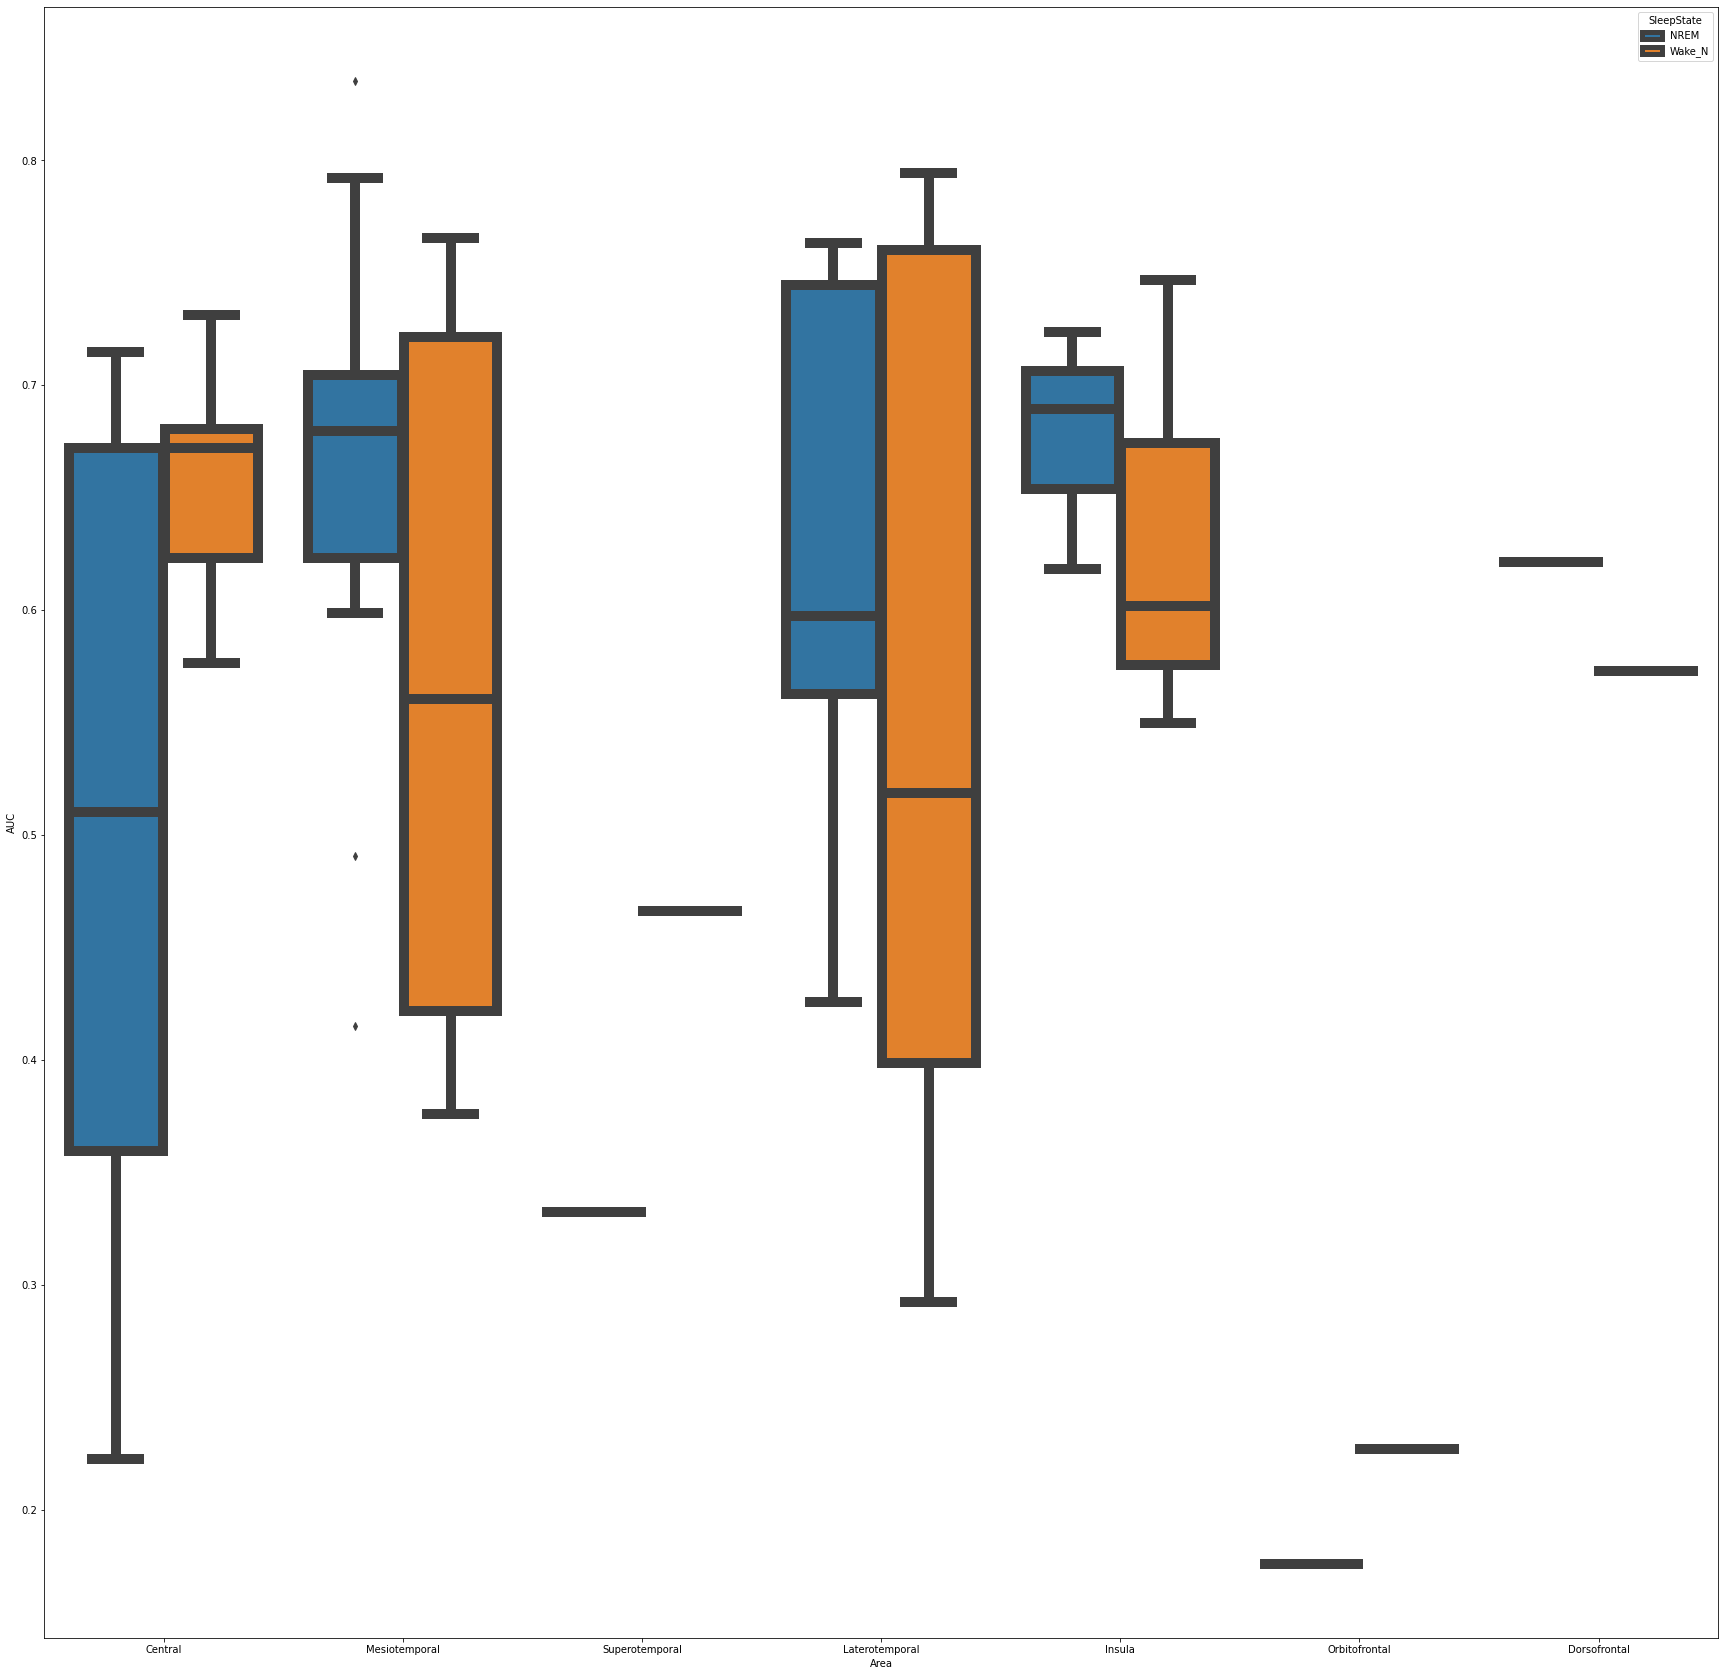

In [170]:
data_plot = data_con[data_con.Pearson>0]
data_plot = data_plot[(data_plot.SleepState=='NREM')|(data_plot.SleepState=='Wake_N')]
fig = plt.figure(figsize=(30,30))
fig.patch.set_facecolor('xkcd:white')
sns.boxplot(x='Area', y= 'AUC', hue='SleepState', data= data_plot, linewidth= 10)

0.03125


(0.2, 0.9)

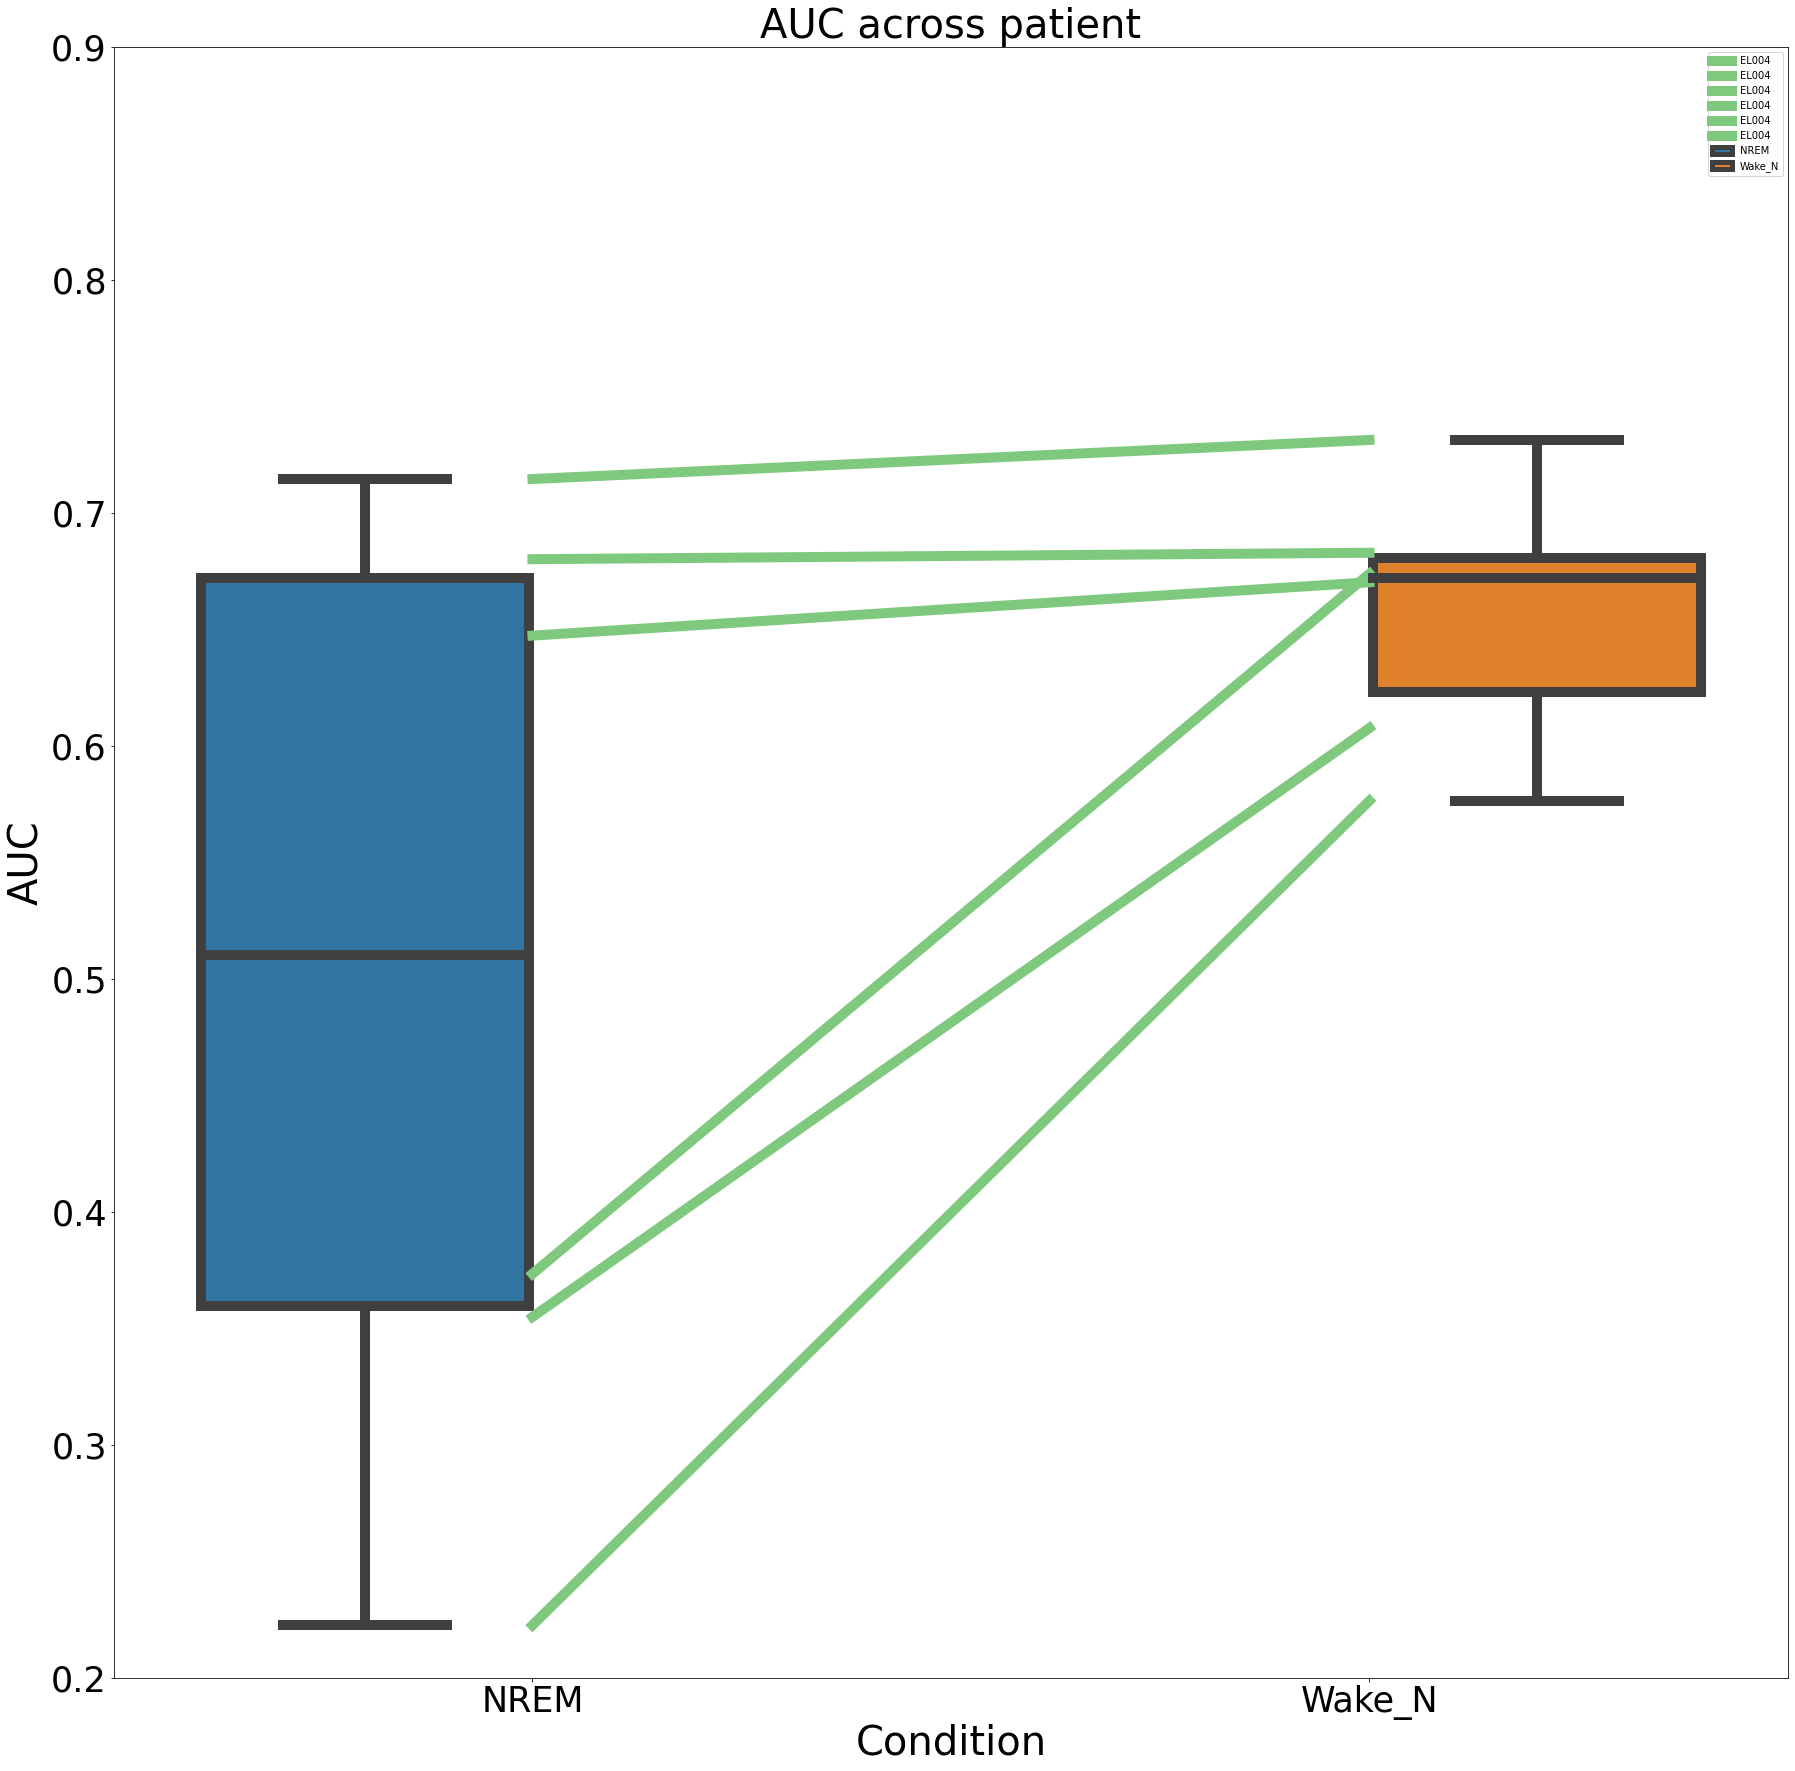

In [171]:
data_plot = data_con[data_con.Area=='Central']
data_plot = data_plot[(data_plot.SleepState=='NREM')|(data_plot.SleepState=='Wake_N')]
w, p = wilcoxon(data_plot.loc[data_plot.SleepState=='NREM', 'AUC'], data_plot.loc[data_plot.SleepState=='Wake_N', 'AUC'])
print(p)

color_subj=mcp.gen_color(cmap='Accent',n=len(np.unique(data_plot.Subj)))

fig = plt.figure(figsize=(30,30))
fig.patch.set_facecolor('xkcd:white')
j= 0
for s in np.unique(data_plot.Subj):
    l =0
    for stim in np.unique(data_plot.loc[(data_plot.Subj==s), 'Stim']):
        for h in np.unique(data_plot.loc[(data_plot.Stim==stim)&(data_plot.Subj==s), 'H']):
            dat = data_plot.loc[(data_plot.H==h)&(data_plot.Stim==stim)&(data_plot.Subj==s)]
            # if l ==0:
            #     plt.plot(0.5*(dat.Condition-1), dat.AUC, linewidth=4, color= color_subj[j], label= s)
            # else:
            #     plt.plot(0.5*(dat.Condition-1), dat.AUC, linewidth=4, color= color_subj[j])
            plt.plot(dat.SleepState, dat.AUC, linewidth=10, color= color_subj[j], label=s)
            # plt.plot(0.5*(dat.Condition-1), dat.AUC, linewidth=10, color= color_subj[j])
            l = l+1
            
    j = j+1
plt.legend()
plt.xticks([1,3])

ax =sns.boxplot(x='SleepState', y= 'AUC', hue='SleepState', data= data_plot, linewidth= 10)
# plt.xticks([0,1],[cond_labels[1],cond_labels[3]] )
plt.xlabel('Condition', fontsize=40)
plt.ylabel('AUC', fontsize=40)
plt.title('AUC across patient', fontsize=40)
plt.tick_params(axis='both', labelsize=35)
plt.legend()
plt.ylim([0.2,0.9])
#plt.savefig(os.path.join(path_patients, "all","Analysis", "IO", "Ph", "NNMF", "figures", "AUC_Ph.svg"), transparent=True)
#plt.savefig(os.path.join(path_patients, "all","Analysis", "IO", "Ph", "NNMF", "figures", "AUC_Ph.jpg"), transparent=True)

(0.2, 0.9)

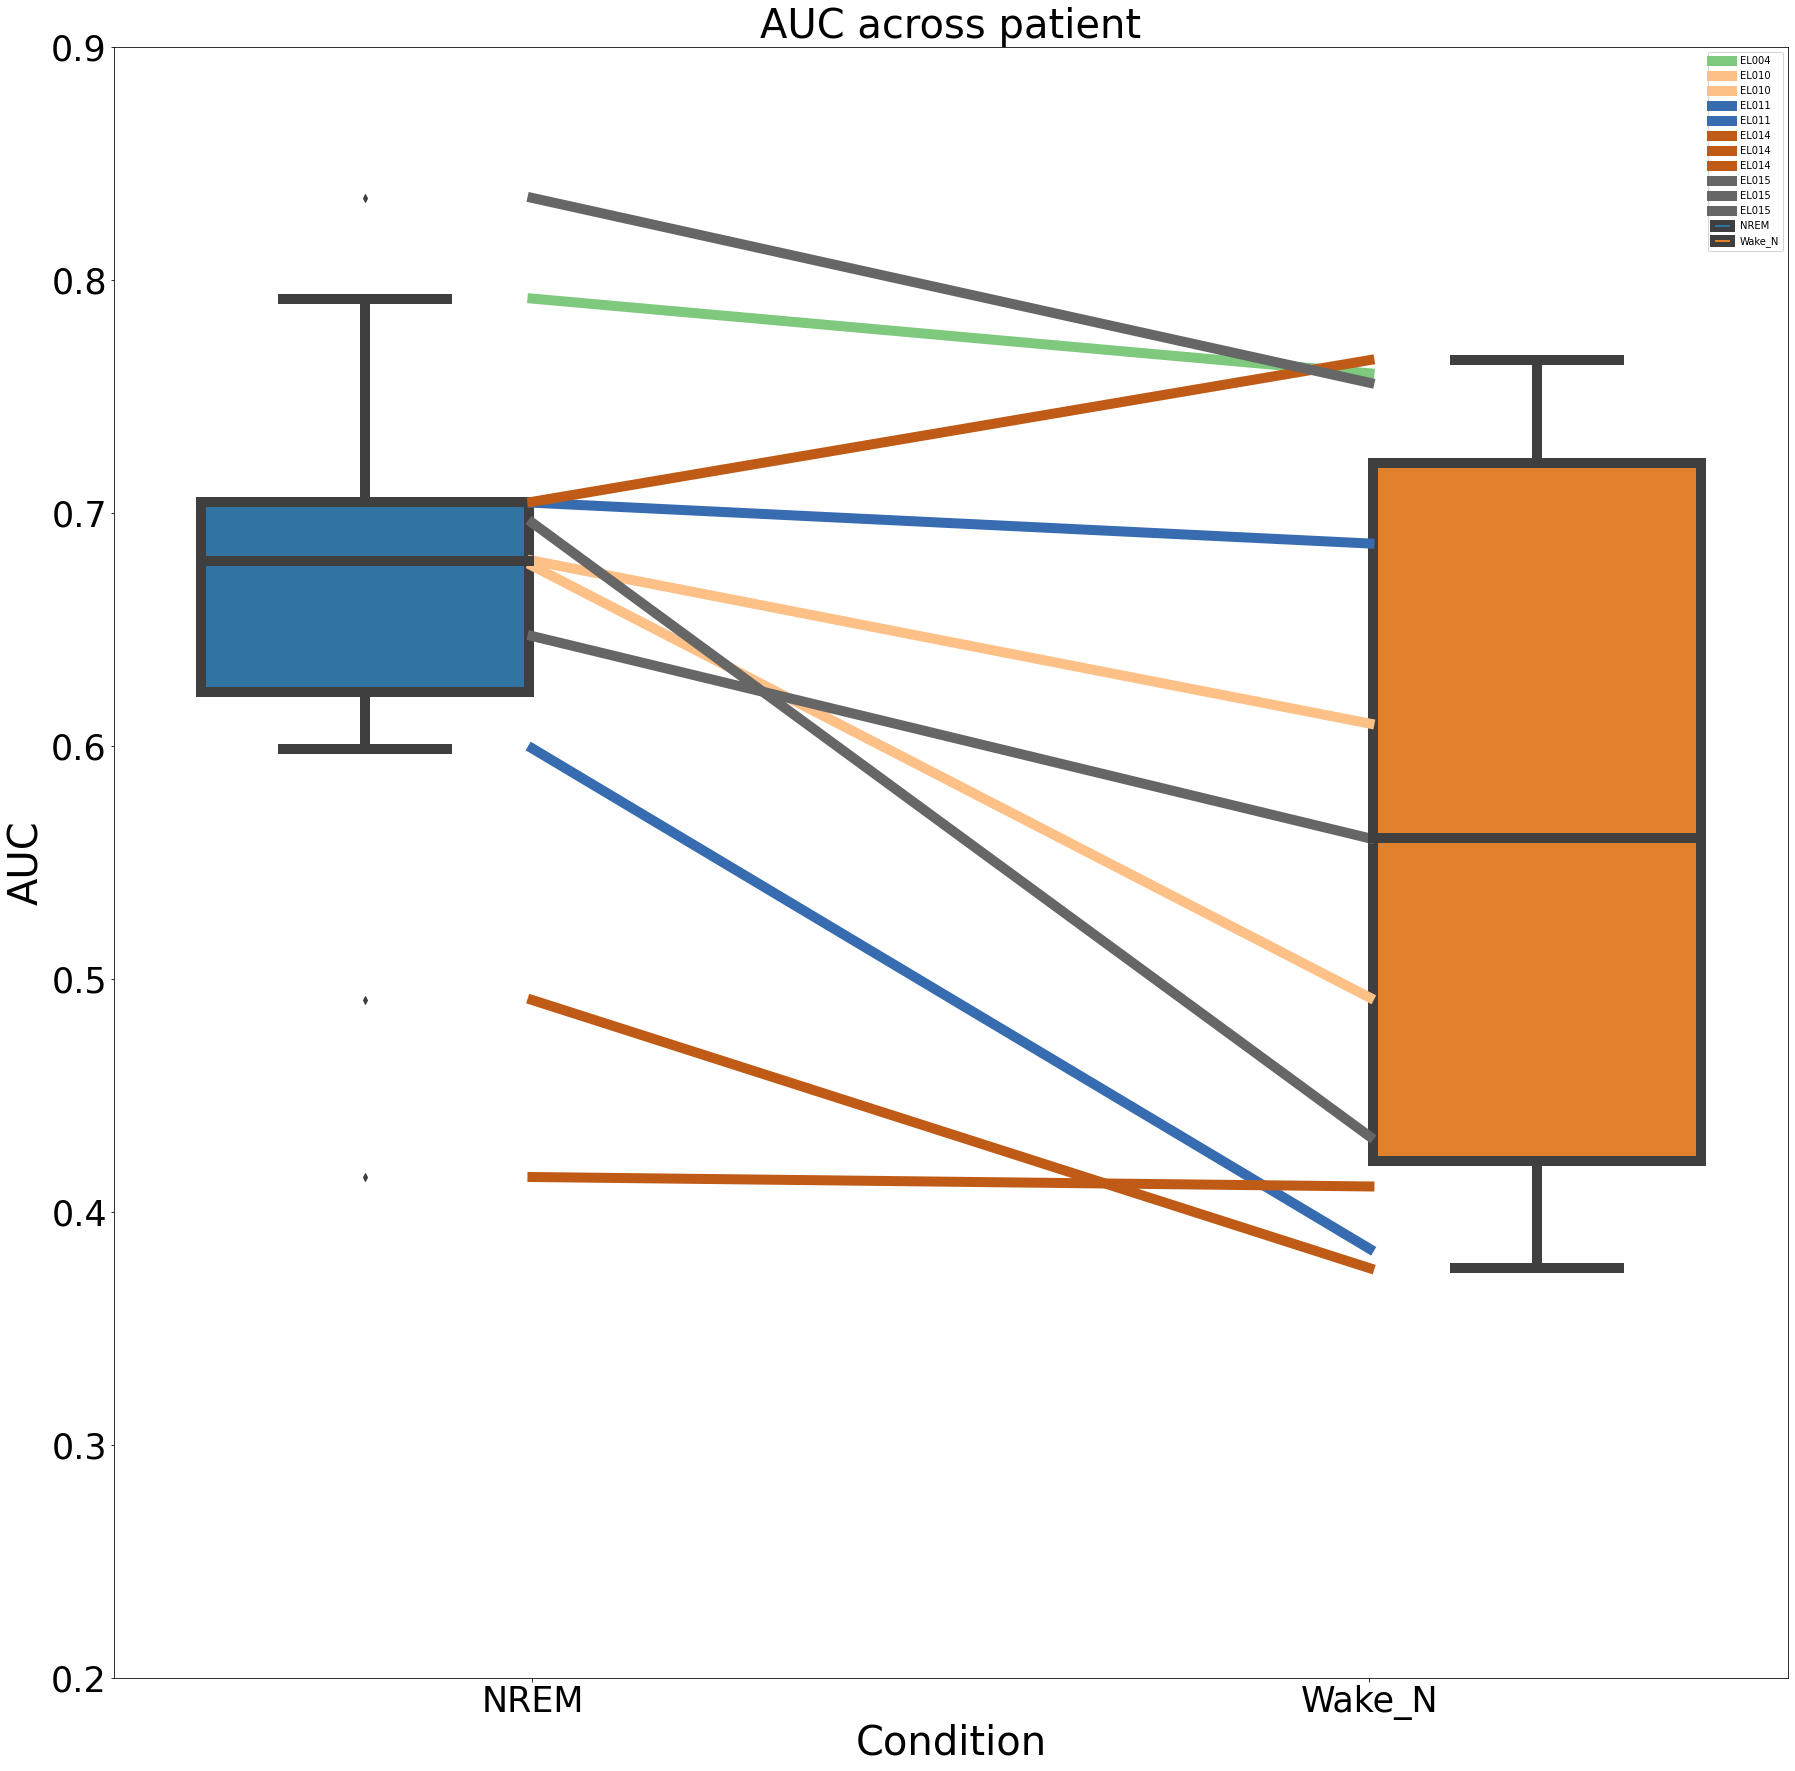

In [152]:
color_subj=mcp.gen_color(cmap='Accent',n=len(np.unique(data_plot.Subj)))

fig = plt.figure(figsize=(30,30))
fig.patch.set_facecolor('xkcd:white')
j= 0
for s in np.unique(data_plot.Subj):
    l =0
    for stim in np.unique(data_plot.loc[(data_plot.Subj==s), 'Stim']):
        for h in np.unique(data_plot.loc[(data_plot.Stim==stim)&(data_plot.Subj==s), 'H']):
            dat = data_plot.loc[(data_plot.H==h)&(data_plot.Stim==stim)&(data_plot.Subj==s)]
            # if l ==0:
            #     plt.plot(0.5*(dat.Condition-1), dat.AUC, linewidth=4, color= color_subj[j], label= s)
            # else:
            #     plt.plot(0.5*(dat.Condition-1), dat.AUC, linewidth=4, color= color_subj[j])
            plt.plot(dat.SleepState, dat.AUC, linewidth=10, color= color_subj[j], label=s)
            # plt.plot(0.5*(dat.Condition-1), dat.AUC, linewidth=10, color= color_subj[j])
            l = l+1
            
    j = j+1
plt.legend()
plt.xticks([1,3])

ax =sns.boxplot(x='SleepState', y= 'AUC', hue='SleepState', data= data_plot, linewidth= 10)
# plt.xticks([0,1],[cond_labels[1],cond_labels[3]] )
plt.xlabel('Condition', fontsize=40)
plt.ylabel('AUC', fontsize=40)
plt.title('AUC across patient', fontsize=40)
plt.tick_params(axis='both', labelsize=35)
plt.legend()
plt.ylim([0.2,0.9])
#plt.savefig(os.path.join(path_patients, "all","Analysis", "IO", "Ph", "NNMF", "figures", "AUC_Ph.svg"), transparent=True)
#plt.savefig(os.path.join(path_patients, "all","Analysis", "IO", "Ph", "NNMF", "figures", "AUC_Ph.jpg"), transparent=True)

c:\users\i0328442\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\i0328442\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(0.0, 2.0)

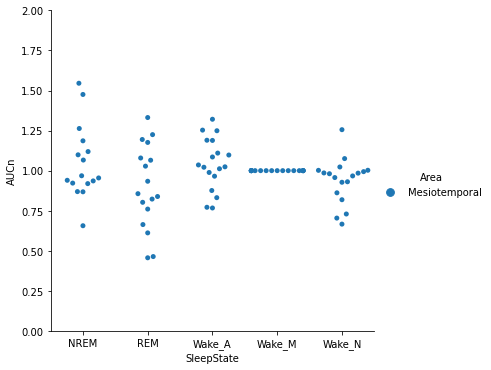

In [9]:
sns.catplot(x='SleepState', y='AUCn',hue='Area',data=data_con[data_con.Area=='Mesiotemporal'], kind='swarm')
plt.ylim([0,2])

c:\users\i0328442\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\i0328442\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\i0328442\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\i0328442\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.

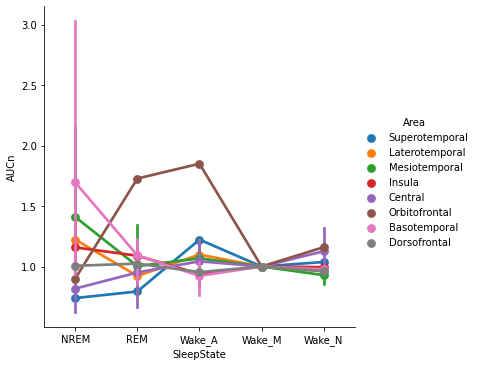

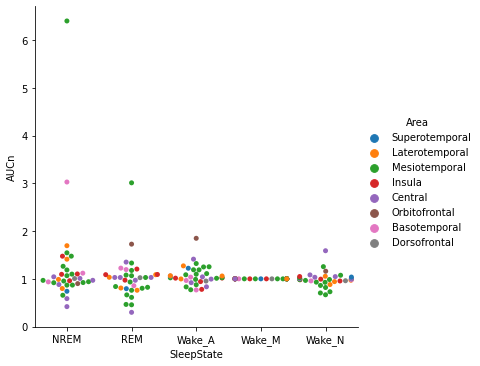

In [263]:
sns.catplot(x='SleepState', y='AUCn',hue='Area',data=data_con, kind='point')
sns.catplot(x='SleepState', y='AUCn',hue='Area',data=data_con, kind='swarm')
#plt.ylim([0.5,1.5])

c:\users\i0328442\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


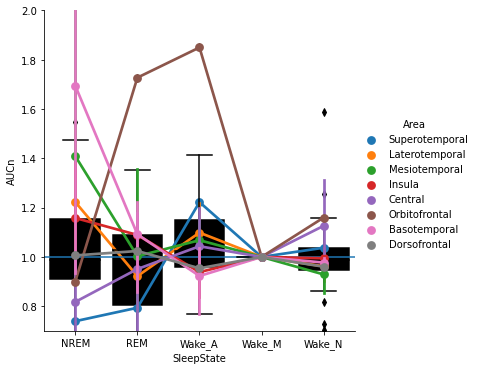

In [258]:
sns.catplot(x='SleepState', y='AUCn',hue='Area',data=data_con, kind='point')
sns.boxplot(data_con.SleepState, data_con.AUCn,color=[0,0,0])
plt.ylim([0.7,2])
plt.axhline(1)

In [ ]:
subjs = ["EL005", "EL004", "EL010", "EL011", "EL013", "EL012", "El014"]
cond_folder  ='CR'
condition = 'Sleep'
## NMF AUC
for i in range(len(subjs)):
    print('loading -- '+subjs[i], end='\r')
    if platform.system()=='Windows':
        path_patient = 'T:\EL_experiment\Patients\\'+subjs[i]
    else: #'Darwin' for MAC
        path_patient    = '/Volumes/EvM_T7/PhD/EL_experiment/Patients/'+subjs[i]
    # labels
    lbls            = pd.read_excel(path_patient + "/infos/" + subjs[i] + "_labels.xlsx", header=0, sheet_name='BP')
    labels_all      = lbls.label.values
    labels_clinic   = lbls.Clinic.values
    labels_region   = lbls.Region.values
    # load connections
    file         = glob.glob(path_patient + '/Analysis/InputOutput/' + cond_folder + '/NNMF/IO_'+condition+'_AUC_LLpeak_1*.csv')[0]

    data_A    = pd.read_csv(file)
    data_A.insert(0, 'Subj', subjs[i])
    
    #data_A = data_A[~np.isnan(data_A.N1.values)]
    if i==0:
        data_con    = data_A
    else:
        data_con = pd.concat([data_con, data_A])   

In [ ]:
sns.catplot(x='SleepState', y='AUC', hue='Area', data=data_A)

## plots

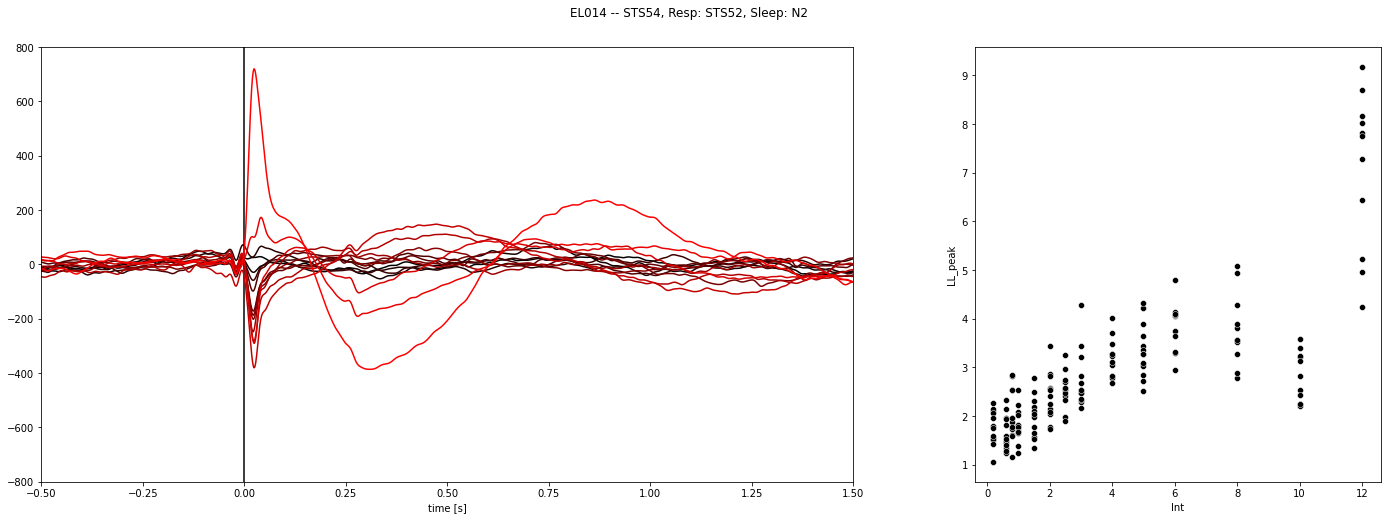

In [55]:
ss = 2
rc = 51
sc = 53
LL_CCEP = con_trial[((con_trial.Hour<9)|(con_trial.Hour>21))&(con_trial.Sleep==ss)]
plot_Ints_IO(sc, rc, LL_CCEP,EEG_resp, labels_all, sleep_labels[ss])

In [51]:
def plot_Ints_IO(sc, rc, LL_CCEP,EEG_resp, labels_all, ss):
    lists   = LL_CCEP[(LL_CCEP['Chan']==rc)&(LL_CCEP['Stim']==sc)]#&(LL_CCEP['Int']==Int)
    lists          = lists[~np.isnan(lists.LL.values)]
    stimNum_all    = lists.Num.values.astype('int')
    Int_all = np.unique(lists.Int)
    colors_Int = np.zeros((len(Int_all), 3))
    colors_Int[:, 0] = np.linspace(0, 1, len(Int_all))
    fig   = plt.figure(figsize=(24,8) )
    gs       = fig.add_gridspec(1,2,width_ratios=[2,1])  # GridSpec(4,1, height_ratios=[1,2,1,2])
    plt.suptitle(subj+' -- '+labels_all[np.int64(sc)]+', Resp: '+labels_all[np.int64(rc)]+', Sleep: '+ss , y=0.95)
    #plt.title(labels_all[Stim_chs]+' -- '+labels_clinic[rc])
    #plt.title(labels_all[sc]+' -- '+labels_all[rc])#+', Dist: '+str(np.round(lists.d.values[0]))+'mm'
    ax = fig.add_subplot(gs[0,0])
    plt.xlim([-0.5,1.5])
    
    plt.axvline(0, c=[0,0,0])
    plt.xlabel('time [s]')
    limy = 600
    for i in range(len(Int_all)):
        list_Int = lists[lists.Int==Int_all[i]]
        stimNum_all                  = list_Int.Num.values.astype('int')
        plt.plot(x_ax,ff.lp_filter(np.mean(EEG_resp[rc,stimNum_all,:],0),45,Fs), c=colors_Int[i], linewidth=1.5)
        lim= np.min([800, np.max(abs(np.mean(EEG_resp[rc,stimNum_all,:],0)))*1.1])
        limy = np.max([limy, lim])
    plt.ylim([-limy,limy])
    ax = fig.add_subplot(gs[0,1])
    #sns.set_palette(sns.color_palette(colors_Int))
    sns.scatterplot(x = 'Int', y= 'LL_peak',  data= lists)
    # plt.ylim([0,10])
    plt.show()

## plot some raw responses

In [ ]:
EEG_resp_33 = np.load(path_patient + '/Analysis/' + folder + '/data/ALL_resps_'+files_list[0][-11:-4]+'.npy')
EEG_resp_34 = np.load(path_patient + '/Analysis/' + folder + '/data/ALL_resps_'+files_list[1][-11:-4]+'.npy')

In [ ]:
EEG_resp = np.concatenate([EEG_resp_33, EEG_resp_34], 1)

In [9]:
sleep_labels = ['W', 'N1', 'N2', 'N3', 'REM']

In [ ]:
stimlist = stimlist.reset_index(drop=True)

In [ ]:
stimlist[(stimlist.ChanP == 59)&(stimlist.sleep == s)]

In [ ]:
sc = 53
rc = 50
s = 4
lists   = LL_CCEP[(LL_CCEP.Sleep == s)&(LL_CCEP['Chan']==rc)&(LL_CCEP['Stim']==sc)]#&(LL_CCEP['Int']==Int)
lists          = lists[~np.isnan(lists.LL.values)]
lists

In [ ]:
s = 2
rc = 46
sc = 44
plot_Ints_IO(sc, rc, LL_CCEP[LL_CCEP.Sleep == s],EEG_resp, labels_all, sleep_labels[s])

In [ ]:
colors = ["#FF0B04", "#4374B3"]# Set your custom color palette
sns.set_palette(sns.color_palette(colors_Int))

In [ ]:
def plot_Ints(sc, rc, LL_CCEP,EEG_resp, labels_all):
    lists   = LL_CCEP[(LL_CCEP['Chan']==rc)&(LL_CCEP['Stim']==sc)]#&(LL_CCEP['Int']==Int)
    lists          = lists[~np.isnan(lists.LL.values)]
    stimNum_all    = lists.Num_block.values.astype('int')
    Int_all = np.unique(lists.Int)
    colors_Int = np.zeros((len(Int_all), 3))
    colors_Int[:, 0] = np.linspace(0, 1, len(Int_all))
    fig   = plt.figure(figsize=(10,5) )
    #plt.title(labels_all[Stim_chs]+' -- '+labels_clinic[rc])
    plt.title(labels_all[sc]+' -- '+labels_all[rc])#+', Dist: '+str(np.round(lists.d.values[0]))+'mm'
    plt.xlim([-0.6,2])
    
    plt.axvline(0, c=[0,0,0])
    plt.xlabel('time [s]')
    limy = 600
    for i in range(len(Int_all)):
        list_Int = lists[lists.Int==Int_all[i]]
        stimNum_all                  = list_Int.Num_block.values.astype('int')
        plt.plot(x_ax,ff.lp_filter(np.mean(EEG_resp[rc,stimNum_all,:],0),45,Fs), c=colors_Int[i], linewidth=1.5)
        lim= np.max(abs(np.mean(EEG_resp[rc,stimNum_all,:],0)))*1.1
        limy = np.max([limy, lim])
    plt.ylim([-limy,limy])
    plt.show()

# find outliers

In [ ]:
con_trial.to_csv(file_con_trial, index=False, header=True)

In [ ]:
Stims = np.unique(con_trial.Stim)
sc = Stims[0] 
rc = -1


In [ ]:
if  ('zLL' in con_trial.columns):
    con_trial = con_trial.drop(columns= 'zLL')

con_trial.insert(0, 'zLL', 0)

con_trial.zLL = con_trial.groupby(['Stim', 'Chan', 'Int'])['LL_peak'].transform(lambda x: (x - x.mean()) / x.std()).values
con_trial.loc[(con_trial.zLL > 3.5), 'LL'] = np.nan
con_trial.loc[(con_trial.zLL < -3), 'LL'] = np.nan
#con_trial = con_trial.drop(columns='zLL')
con_trial.loc[np.isnan(con_trial.LL), 'LL_peak'] = np.nan

In [ ]:
rc = rc-2

In [ ]:
rc = rc+1
plt.figure(figsize=(6,6))
# plot_IO(sc, rc, con_trial_block,EEG_resp,labels_all)
plt.title(labels_all[int(sc)]+'--' +labels_all[rc])
sns.scatterplot(x='Int', y='LL_peak', data= con_trial[(con_trial.LL>0)&(con_trial.Stim==sc)&(con_trial.Chan==rc)])
plt.show()
plt.figure(figsize=(6,6))
# plot_IO(sc, rc, con_trial_block,EEG_resp,labels_all)
plt.title(labels_all[int(sc)]+'--' +labels_all[rc])
sns.scatterplot(x='Int', y='zLL', data= con_trial[(con_trial.LL>0)&(con_trial.Stim==sc)&(con_trial.Chan==rc)])
plt.show()

In [ ]:
rc=-1

In [ ]:
rc = rc+1
plt.figure(figsize=(8,8))
# plot_IO(sc, rc, con_trial_block,EEG_resp,labels_all)
plt.title(labels_all[int(sc)]+'--' +labels_all[rc])
sns.scatterplot(x='Int', y='LL_peak', data= con_trial[(con_trial.LL>0)&(con_trial.Stim==sc)&(con_trial.Chan==rc)])
plt.show()

In [ ]:
plt.figure(figsize=(6,6))
# plot_IO(sc, rc, con_trial_block,EEG_resp,labels_all)
plt.title(labels_all[int(sc)]+'--' +labels_all[rc])
sns.scatterplot(x='Int', y='zLL', data= con_trial[(con_trial.LL>0)&(con_trial.Stim==sc)&(con_trial.Chan==rc)])
plt.show()

### normalize

In [ ]:
badchans = pd.read_csv(path_patient + '/Analysis/InputOutput/data/badchan.csv')
bad_chans = np.unique(np.array(np.where(badchans.values[:, 1:] == 1))[0, :])
bad_chans = np.where(np.mean(badchans.values[:, 1:],1)>0.3)[0]

## NNMF

In [ ]:
CR_color_a = CR_color.a.values
CR_color = CR_color.c.values
CR_color = np.zeros((24,3))
CR_color[6:18,:] =np.array([253, 184, 19 ])/255
CR_labels = []
for i in range(24):
    CR_labels.append(f"{i:02}"+":00")

In [ ]:
cond = 'Block'

In [ ]:
file = glob(path_patient + '/Analysis/' + folder + '/'+cond_folder+'/NNMF/IO_'+cond+'_AUC_LLpeak_1*.csv')
CR_NMF_AUC = pd.read_csv(file[0])

In [ ]:
CR_NMF_AUC

In [ ]:
CR_NMF_AUC = CR_NMF_AUC[CR_NMF_AUC.Pearson>0]

In [ ]:
#CR_NMF_AUC.loc[(CR_NMF_AUC.H==6)&(CR_NMF_AUC.Stim!=7), 'Pearson'] = 0

In [ ]:
CR_NMF_AUC = CR_NMF_AUC[CR_NMF_AUC.Pearson>0.5]

In [ ]:
CR_NMF_AUC[(CR_NMF_AUC.H==2)&(CR_NMF_AUC.AUC>0.675)]

In [ ]:
h_all

In [ ]:
# load hypnogram
file_hypno = path_patient + '/Analysis/stimlist_hypnogram.csv'
if os.path.isfile(file_hypno):
    stimlist_hypno = pd.read_csv(file_hypno)
    
#add chornologic hours for plotting
#stimlist_hypno.insert(0, 'ix_chron', 0)
for d in range(len(np.unique(stimlist_hypno.date))):
    stimlist_hypno.loc[stimlist_hypno.date == np.unique(stimlist_hypno.date)[d],'ix_chron']= stimlist_hypno.loc[stimlist_hypno.date == np.unique(stimlist_hypno.date)[d],'ix_h']+d*24
    
NNMF_AUC.insert(1,'H_chron', 0)
NNMF_AUC['H_chron'] = NNMF_AUC['Hour']+24*NNMF_AUC['Day']    


##hypnogram ticks
h_0  = np.floor(np.min(stimlist_hypno.ix_chron))
h_end = np.ceil(np.max(stimlist_hypno.ix_chron))
xt = np.arange(h_0, h_end,np.floor((h_end-h_0)/5))
xl = []
for i in range(len(xt)):
    x_raw = xt[i].astype('int')
    while x_raw>23:
        x_raw = x_raw-24
    xl.append(f"{x_raw:02}"+":00")
    
block = np.unique(NNMF_AUC.Block)

In [ ]:
h_all = np.unique(CR_NMF_AUC.H)
for h in h_all:
    AUC_plot = CR_NMF_AUC[CR_NMF_AUC.H==h]
    plt.figure(figsize=(10,2))
    plt.title(subj+' -- '+labels_all[AUC_plot.Stim.values[0].astype('int')])
    plt.axhline(np.mean(AUC_plot.AUC), color = [0,0,0], alpha=0.5)
    plt.plot(AUC_plot.Block, AUC_plot.AUC, linewidth=3)
    #plt.scatter(AUC_plot.Block, AUC_plot.AUC)
    

In [ ]:
CR_NMF_AUC

In [ ]:
fig      = plt.figure(figsize=(15,15), facecolor='w', edgecolor='k')
gs       = fig.add_gridspec(2,1)  # GridSpec(4,1, height_ratios=[1,2,1,2])
plt.suptitle(subj+' -- '+labels_all[np.int64(sc)]+', Resp: '+labels_all[np.int64(rc)], y=0.95)

ax = fig.add_subplot(gs[0,0])
for i in range(len(StimNum)):
    plt.plot(x_ax, EEG_resp[rc, StimNum[i],:],0)
plt.axvline(0, c=[0,0,0])
fig.add_subplot(gs[1,0], sharex=ax)
for i in range(len(StimNum)):
    plt.plot(x_ax_LL, LL_trial[rc, StimNum[i],:],0)
#plt.xlim([-0.2, 0.5])
plt.axvline(0, c=[0,0,0])
plt.axvline(w/2, c=[0,0,0])

## test IO for specific block

In [ ]:
files_list

In [ ]:
l =33
print('loading '+files_list[l][-11:-4], end='\r')
stimlist33 = pd.read_csv(files_list[l])
if not ('StimNum' in stimlist33.columns):
    stimlist33.insert(5,'StimNum',np.arange(len(stimlist) ))
else:
    stimlist33.StimNum= np.arange(len(stimlist))  
EEG_resp33 = np.load(path_patient + '/Analysis/' + folder + '/data/ALL_resps_'+files_list[l][-11:-4]+'.npy')

block_l = files_list[l][-11:-4]
file = path_patient + '/Analysis/InputOutput/' + cond_folder + '/data/con_trial'+block_l+'.csv'
con_trial_block33 = pd.read_csv(file)

In [ ]:
l =22
print('loading '+files_list[l][-11:-4], end='\r')
stimlist = pd.read_csv(files_list[l])
if not ('StimNum' in stimlist.columns):
    stimlist.insert(5,'StimNum',np.arange(len(stimlist) ))
else:
    stimlist.StimNum= np.arange(len(stimlist))  
EEG_resp = np.load(path_patient + '/Analysis/' + folder + '/data/ALL_resps_'+files_list[l][-11:-4]+'.npy')

block_l = files_list[l][-11:-4]
file = path_patient + '/Analysis/InputOutput/' + cond_folder + '/data/con_trial'+block_l+'.csv'
con_trial_block = pd.read_csv(file)

In [ ]:
l =22
print('loading '+files_list[l][-11:-4], end='\r')
stimlist = pd.read_csv(files_list[l])
if not ('StimNum' in stimlist.columns):
    stimlist.insert(5,'StimNum',np.arange(len(stimlist) ))
else:
    stimlist.StimNum= np.arange(len(stimlist))  
EEG_resp = np.load(path_patient + '/Analysis/' + folder + '/data/ALL_resps_'+files_list[l][-11:-4]+'.npy')

block_l = files_list[l][-11:-4]
file = path_patient + '/Analysis/InputOutput/' + cond_folder + '/data/con_trial'+block_l+'.csv'
con_trial_block = pd.read_csv(file)

In [ ]:
con_trial_block33

In [ ]:
con_trial_block

In [ ]:
sc = 5
rc = 0
plot_Ints(sc, rc, con_trial_block33,EEG_resp33, labels_all)
plot_Ints(sc, rc, con_trial_block,EEG_resp, labels_all)

In [ ]:
plot_Ints(sc, rc, con_trial_block,EEG_resp, labels_all)

In [ ]:
def plot_Ints(sc, rc, LL_CCEP,EEG_resp, labels_all):
    lists   = LL_CCEP[(LL_CCEP['Chan']==rc)&(LL_CCEP['Stim']==sc)]#&(LL_CCEP['Int']==Int)
    lists          = lists[~np.isnan(lists.LL.values)]
    stimNum_all    = lists.Num_block.values.astype('int')
    Int_all = np.unique(lists.Int)
    colors_Int = np.zeros((len(Int_all), 3))
    colors_Int[:, 0] = np.linspace(0, 1, len(Int_all))
    fig   = plt.figure(figsize=(10,5) )
    #plt.title(labels_all[Stim_chs]+' -- '+labels_clinic[rc])
    plt.title(labels_all[sc]+' -- '+labels_all[rc])#+', Dist: '+str(np.round(lists.d.values[0]))+'mm'
    plt.xlim([-0.6,2])
    
    plt.axvline(0, c=[0,0,0])
    plt.xlabel('time [s]')
    limy = 300
    for i in range(len(Int_all)):
        list_Int = lists[lists.Int==Int_all[i]]
        stimNum_all                  = list_Int.Num_block.values.astype('int')
        plt.plot(x_ax,ff.lp_filter(np.mean(EEG_resp[rc,stimNum_all,:],0),45,Fs), c=colors_Int[i], linewidth=1.5)
        lim= np.max(abs(np.mean(EEG_resp[rc,stimNum_all,:],0)))*1.1
        limy = np.max([limy, lim])
    plt.ylim([-limy,limy])
    plt.show()